# Commands to get results

```bash
cd hh_combination_fw
source setup.sh

mkdir run_heft
cd run_heft
cp ../configs/correlation_schemes/Legacy2022/nonres_v2.json correlation.json
cp ../configs/task_options/Legacy2022/nonres_heft_v1.yaml option_heft.yaml
fullwspath="/eos/atlas/atlascerngroupdisk/phys-hdbs/diHiggs/combination/FullRun2Workspaces"

HHComb process_channels -i ${fullwspath}/original/LegacyRun2/20240320 -c bbbb,bbtautau,bbyy -n heft --file_expr '<mX[F]>_chhh' -o output --config option_heft.yaml --unblind --tasks modification,likelihood
HHComb combine_channels -i output -s correlation.json -c bbbb,bbtautau,bbyy -n heft --file_expr '<mX[F]>_chhh' --config option_heft.yaml --unblind --tasks combination,likelihood

cp ../configs/task_options/Legacy2022/heft_BMs/nonres_BMi.yaml option_BMi.yaml
HHComb process_channels -i ${fullwspath}/original/LegacyRun2/20240320 -c bbbb,bbtautau,bbyy -n heft --file_expr 'BMi' -o output --config option_BMi.yaml --unblind --tasks modification,limit
HHComb combine_channels -i output -s correlation.json -c bbbb,bbtautau,bbyy -n heft --file_expr 'BMi' --config option_BMi.yaml --unblind --tasks combination,limit
```

# Plotting

In [1]:
import os
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
hh_fw = os.environ.get('hh_combination_fw_path', '/besfs5/users/cyz/HH_comb/hh_combination_fw')
hh_fw = '/Users/zhangrui/LargeBox/sandbox/HHcomb'

os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

resonant_type = 'heft'
status = 'final'

output_dir = os.path.join(hh_fw,"hhcomb_to_upload/heft","output")
combine_tag = 'bbbb_bbtautau_bbyy-fullcorr'

channel_label_map = {
    'bbbb': r"$\mathit{b\bar{b}b\bar{b}}$",
    'bbtautau': r"$\mathit{b\bar{b}\tau\hspace{-0.15}{^+}\hspace{-0.2}{\tau}\hspace{-0.15}{^-}}$",
    'bbyy': r"$\mathit{b\bar{b}\gamma\gamma}$",
    'combined': r"Combined",
}
channel_text = {
    'combined': r'$\mathit{HH\rightarrow b\bar{b}\tau\hspace{-0.15}{^+}\hspace{-0.2}{\tau}\hspace{-0.15}{^-} + b\bar{b}\gamma\gamma + b\bar{b}b\bar{b}}$',
    # 'combined': 'HH combination',
    'bbbb': r'$\mathit{HH\rightarrow b\bar{b}b\bar{b}}$',
    'bbyy': r'$\mathit{HH\rightarrow b\bar{b}\gamma\gamma}$',
    'bbtautau': r'$\mathit{HH\rightarrow b\bar{b}\tau\hspace{-0.15}{^+}\hspace{-0.2}{\tau}\hspace{-0.15}{^-}}$',
}
name_map = {'chhh': r"$\mathit{c_{hhh}}$",
            'ctthh': r"$\mathit{c_{tthh}}$",
            'cgghh': r"$\mathit{c_{gghh}}$"}
default_analysis_label_options = {'loc': (0.03, 0.95),
                                  'fontsize':30, 'energy': '13 TeV', 
                                  'lumi': '126—140 fb$^{-1}$',
                                  'status': status, 'dy': 0.01, 'dy_main': 0.01}
styles_map = {
    'bbyy': {"color": "#9A0EEA", "marker": ","},
    'bbbb': {"color": 'blue', "marker": ","},
    'bbtautau': {"color": "#008f00", "marker": ","},
    'bbll': {"color": "#D2691E", "marker": ","},
    'ml': {"color": "c", "marker": ","},
    'combined': {"color": "k", "marker": ","},
}
config_map = {
    'exp': {
        'contourf_styles': {
            'colors': ["#4AD9D9", "#FDC536",'#FFA07A'],
            'alpha': 1
        },
        'fill_contour': True,
        'legend_label': 'Expected {sigma_label}',
        'bestfit_label': 'Expected best fit ({x:.2f}, {y:.2f})',            
    },
    'obs': {
        'bestfit_styles': {
            'marker': 'P',
            'linewidth': 0,
            'markersize': 15,
            'color': 'k'
        },
        'contour_styles': {
            'colors': ["k", "k", "k"],
            'linestyles': ['solid', 'dashed', 'dotted'],
            'linewidths': 3
        },
        'legend_label': 'Observed {sigma_label}',
        'bestfit_label': 'Best fit ({x:.2f}, {y:.2f})',
        # 'interpolation': 'linear'
    }
}

def set_plotdir(output_dir):
    plotdir = os.path.join(output_dir, 'figures')
    if not os.path.exists(plotdir):
        os.makedirs(plotdir)
    return plotdir


cgghh obs combined 68%: [0.1652 0.388 ] 95%: [-0.3754  0.4924]
cgghh obs bbtautau 68%: [0.1414 0.4434] 95%: [-0.5126  0.5812]
cgghh obs bbbb 68%: [-0.4489 -0.2864] 95%: [-0.6335  0.6008]
68%: [0.1523 0.4575]
cgghh obs bbyy 68%: [-0.2021  0.2913] 95%: [-0.4216  0.516 ]


<Figure size 640x480 with 0 Axes>

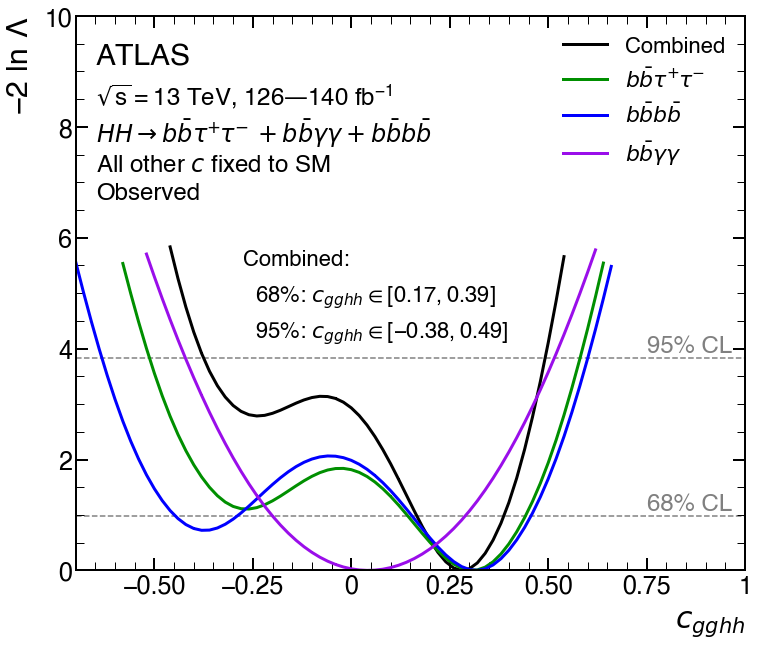

Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_cgghh_obs.pdf
Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_cgghh_obs_combined.csv
Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_cgghh_obs_bbtautau.csv
Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_cgghh_obs_bbbb.csv
Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_cgghh_obs_bbyy.csv
cgghh exp combined 68%: [-0.2353  0.2351] 95%: [-0.3624  0.363 ]
cgghh exp bbtautau 68%: [-0.2671  0.2844] 95%: [-0.4181  0.4359]
cgghh exp bbbb 68%: [-0.3624  0.2985] 95%: [-0.5426  0.4804]
cgghh exp bbyy 68%: [-0.3609  0.4642] 95%: [-0.5867  0.6935]


<Figure size 640x480 with 0 Axes>

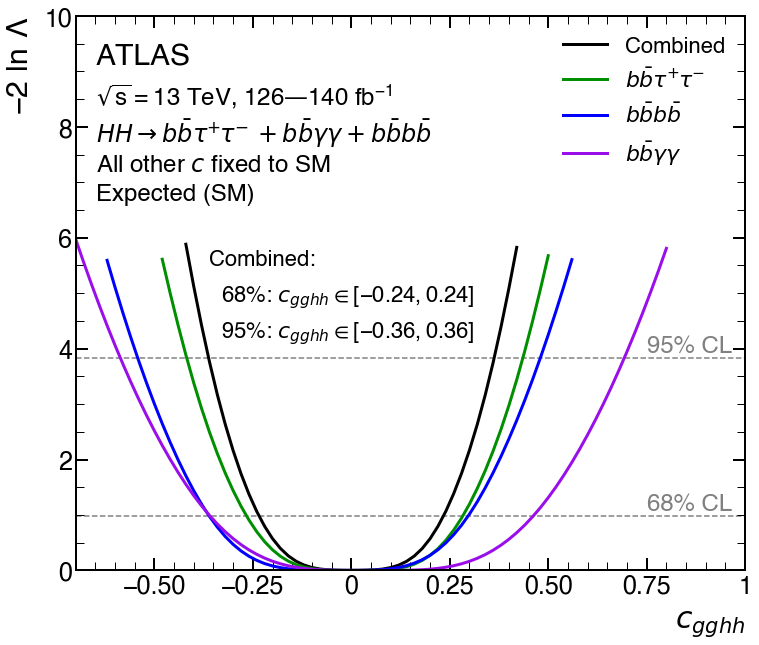

Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_cgghh_exp.pdf
Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_cgghh_exp_combined.csv
Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_cgghh_exp_bbtautau.csv
Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_cgghh_exp_bbbb.csv
Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_cgghh_exp_bbyy.csv
ctthh obs combined 68%: [0.288  0.5818] 95%: [-0.186   0.6992]
ctthh obs bbtautau 68%: [-0.2042 -0.0877] 95%: [-0.4023  0.8422]
68%: [0.4025 0.6997]
ctthh obs bbbb 68%: [-0.0032  0.6198] 95%: [-0.3417  0.8106]
ctthh obs bbyy 68%: [-0.049   0.5003] 95%: [-0.2786  0.7324]


<Figure size 640x480 with 0 Axes>

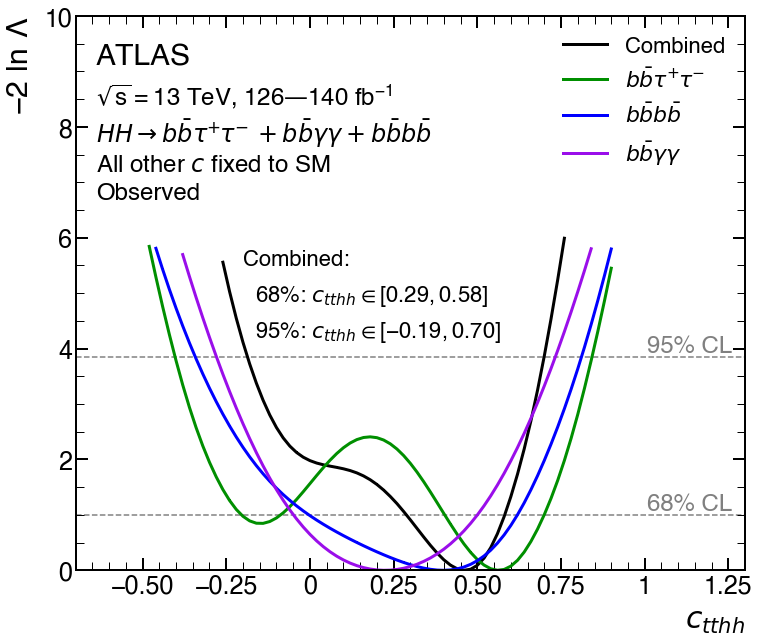

Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_ctthh_obs.pdf
Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_ctthh_obs_combined.csv
Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_ctthh_obs_bbtautau.csv
Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_ctthh_obs_bbbb.csv
Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_ctthh_obs_bbyy.csv
ctthh exp combined 68%: [-0.143   0.5308] 95%: [-0.2694  0.6628]
ctthh exp bbtautau 68%: [-0.167  0.568] 95%: [-0.3144  0.7168]
ctthh exp bbbb 68%: [-0.3023  0.6237] 95%: [-0.5177  0.8488]
ctthh exp bbyy 68%: [-0.2582  0.7162] 95%: [-0.4771  0.9367]


<Figure size 640x480 with 0 Axes>

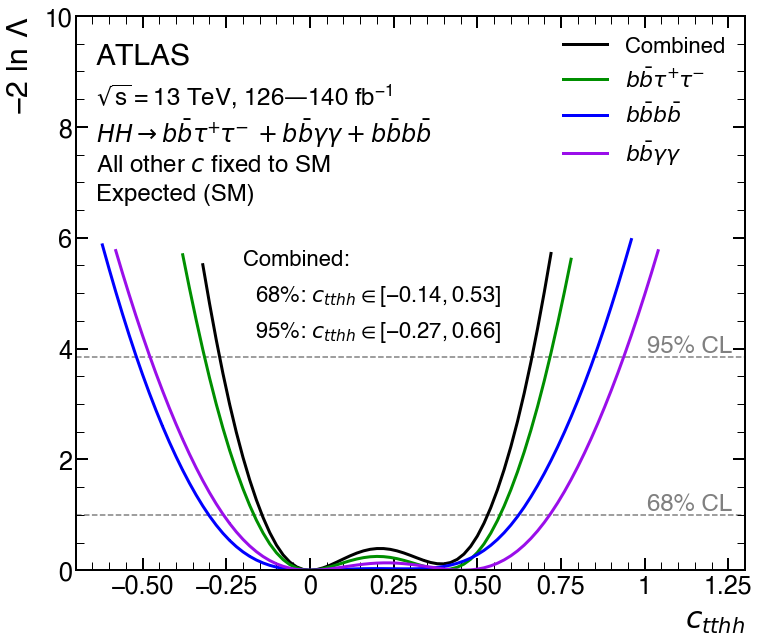

Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_ctthh_exp.pdf
Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_ctthh_exp_combined.csv
Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_ctthh_exp_bbtautau.csv
Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_ctthh_exp_bbbb.csv
Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_ctthh_exp_bbyy.csv


In [2]:
plotdir = set_plotdir(output_dir)

from quickstats.maths.interpolation import get_intervals
from quickstats.plots import Likelihood1DPlot
ylabel = r"$-2\ ln\ \Lambda$"
xrange = {'cgghh': (-0.7, 1.0), 'ctthh': (-0.7, 1.3)}
styles = { 'legend': {'loc': 'upper right',
                    'fontsize': 22},
          'axis':{'tick_bothsides': True,
                  'major_length': 12,
                  'labelsize': 25},
           'xlabel': {'fontsize': 30},
           'ylabel': {'fontsize': 30},
           'plot': {'linewidth': 3},
          'text': {'fontsize': 24},
          'figure': {'figsize': (12,10), 'dpi': 72}}
channels = ['bbtautau', 'bbbb', 'bbyy']

for v in ['cgghh','ctthh']:
    for o in ['obs','exp']:
        default_analysis_label_options['extra_text'] = channel_text['combined'] + "//" + r"All other $\mathit{c}$ fixed to SM" + '//' + ('Observed' if o == 'obs' else 'Expected (SM)')
        data = {}
        for c in  ['combined'] + channels:
            likelihood_path = os.path.join(output_dir, 'likelihood', resonant_type, c, combine_tag if c=='combined' else '', f'{v}_{o}', f'likelihoods_{v}.json')
            if not os.path.exists(likelihood_path):
                print(likelihood_path, 'not exist')
                continue
            data[c] = json.load(open(likelihood_path))
        likelihood_df = {}
        uncond_df = {}
        likelihood_df_orig = {}
        for c in data:
            df = pd.DataFrame(data[c]).dropna(axis=1, how='all')
            uncond_df[c] = df.drop(index=df.index[1:], axis=0, inplace=False)
            df_scan = df.drop(index=df.index[0], axis=0, inplace=False)
            likelihood_df_orig[c] = df_scan.drop(df_scan[df_scan['qmu']>100].index)
            likelihood_df[c] = df_scan.drop(df_scan[df_scan['qmu']>6].index)
        plotter = Likelihood1DPlot(likelihood_df, label_map=channel_label_map, styles_map=styles_map, styles=styles,
                                   analysis_label_options=default_analysis_label_options, config={'errorband_legend': True})
        ax = plotter.draw(xlabel=name_map[v], ylabel=ylabel, ymin=0, ymax=10, xmin=xrange[v][0], xmax=xrange[v][1], xattrib=v, interval_format='68_95')
        dic = {}
        for c in ['combined'] + channels:
            dic[c] = {}
            if c not in likelihood_df: continue
            intersections_1 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=1, delta=0.0001)[0]
            intersections_2 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=3.84, delta=0.0001)[0]
            dic[c]['68% low'], dic[c]['68% high'] = intersections_1
            dic[c]['95% low'], dic[c]['95% high'] = intersections_2
            if c == 'combined':
                if v=='cgghh' and o=='exp':
                    anno_op = {'x': 0.20, 'y': 0.55, 'dy': 0.065, 'font_size': 22}
                    ax.annotate(r'Combined:', 
                                (anno_op['x'], anno_op['y']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                    ax.annotate(r'  $68\%$: '+name_map[v]+r'$ \in [%.2f, %.2f]$' %(intersections_1[0], intersections_1[1]), 
                                (anno_op['x'], anno_op['y'] - anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                    ax.annotate(r'  $95\%$: '+name_map[v]+r'$ \in [%.2f, %.2f]$' %(intersections_2[0], intersections_2[1]), 
                                (anno_op['x'], anno_op['y'] - 2 * anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                else:
                    anno_op = {'x': 0.25, 'y': 0.55, 'dy': 0.065, 'font_size': 22}
                    ax.annotate(r'Combined:', 
                                (anno_op['x'], anno_op['y']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                    ax.annotate(r'  $68\%$: '+name_map[v]+r'$ \in [%.2f, %.2f]$' %(intersections_1[0], intersections_1[1]), 
                                (anno_op['x'], anno_op['y'] - anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
                    ax.annotate(r'  $95\%$: '+name_map[v]+r'$ \in [%.2f, %.2f]$' %(intersections_2[0], intersections_2[1]), 
                                (anno_op['x'], anno_op['y'] - 2 * anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
            print(v, o, c, '68%:', intersections_1, '95%:', intersections_2)
            try:
                intersections_1 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=1, delta=0.0001)[1]
                print('68%:', intersections_1)
            except:
                continue
        os.makedirs(os.path.join(plotdir, f'{status}/likelihood_heft'), exist_ok=True)
        filename = os.path.join(plotdir, f'{status}/likelihood_heft', f"likelihood_{v}_{o}.pdf")
        plt.savefig(filename)
        plt.show()
        print('Save to', filename)
        for chan in likelihood_df.keys():
            likelihood_df[chan].to_csv(filename.replace('.pdf', f'_{chan}.csv'))
            print('Save to', filename.replace('.pdf', f'_{chan}.csv'))
        dic = json.dumps(dic, indent=4, separators=(',', ': '))
        with open(filename.replace('.pdf','.json'), 'w') as json_file:
            json_file.write(dic)


<Figure size 640x480 with 0 Axes>

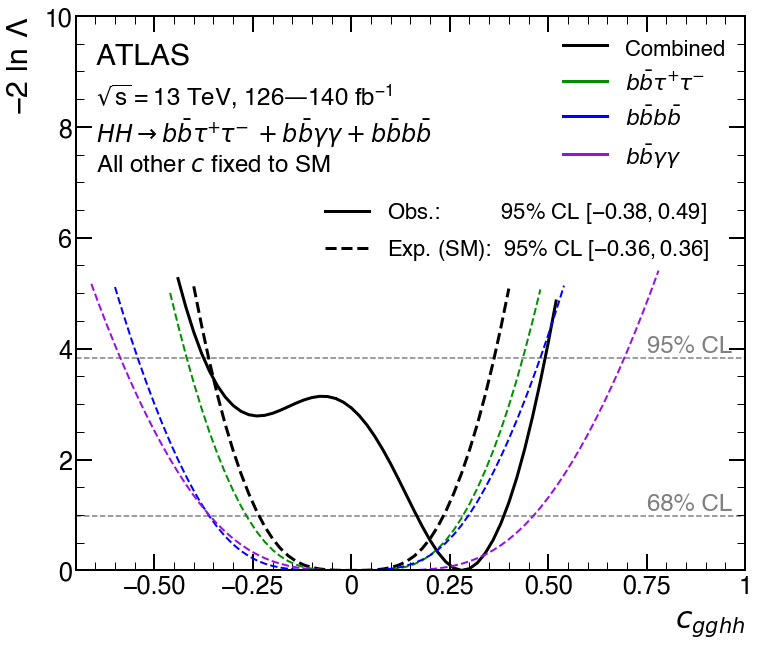

Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_cgghh.pdf


<Figure size 640x480 with 0 Axes>

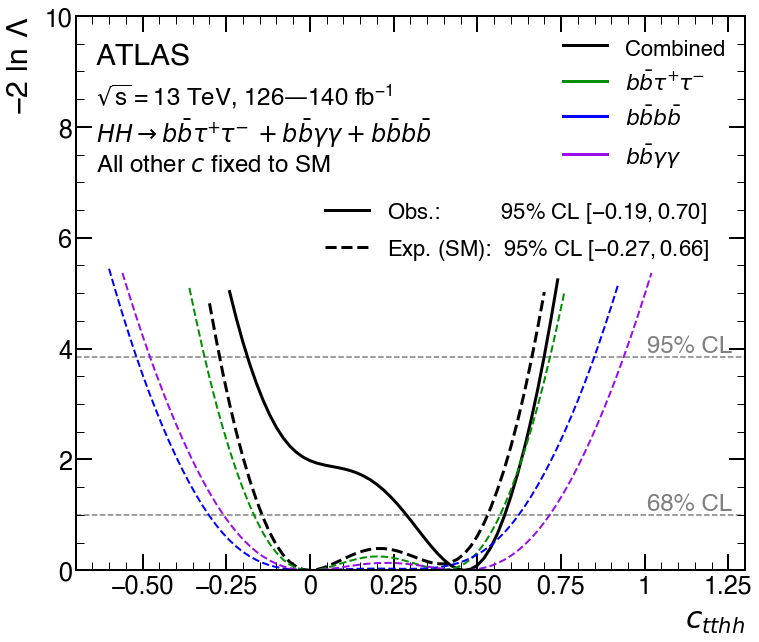

Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_heft/likelihood_ctthh.pdf


In [3]:
plotdir = set_plotdir(output_dir)

from quickstats.maths.interpolation import get_intervals
from quickstats.plots import Likelihood1DPlot
ylabel = r"$-2\ ln\ \Lambda$"
xrange = {'cgghh': (-0.7, 1.0), 'ctthh': (-0.7, 1.3)}
styles = { 'legend': {'loc': 'upper right','fontsize': 22, 'handleheight':1.25},
           'text': {'fontsize': 24},
           'xlabel': {'fontsize': 30},
           'ylabel': {'fontsize': 30},
           'plot': {'linewidth': 3},
           'axis': {'labelsize': 25},
           'figure': {'figsize': (12,10), 'dpi': 72}}
anno_op = {'x': 0.34, 'y': 0.65, 'dy': 0.065, 'font_size': 19}
channels = ['bbtautau', 'bbbb', 'bbyy']

for v in ['cgghh','ctthh']:
    likelihood_df_all = {}
    for o in ['obs','exp']:
        # default_analysis_label_options['extra_text'] = channel_text['combined']
        default_analysis_label_options['extra_text'] = channel_text['combined'] + "//" + r"All other $\mathit{c}$ fixed to SM"
        data = {}
        for c in  ['combined'] + channels:
            likelihood_path = os.path.join(output_dir, 'likelihood', resonant_type, c, combine_tag if c=='combined' else '', f'{v}_{o}', f'likelihoods_{v}.json')
            if not os.path.exists(likelihood_path):
                print(likelihood_path, 'not exist')
                continue
            data[c] = json.load(open(likelihood_path))
        likelihood_df = {}
        uncond_df = {}
        likelihood_df_orig = {}
        for c in data:
            df = pd.DataFrame(data[c]).dropna(axis=1, how='all')
            uncond_df[c] = df.drop(index=df.index[1:], axis=0, inplace=False)
            df_scan = df.drop(index=df.index[0], axis=0, inplace=False)
            likelihood_df_orig[c] = df_scan.drop(df_scan[df_scan['qmu']>100].index)
            likelihood_df[c] = df_scan.drop(df_scan[df_scan['qmu']>5.5].index)
        likelihood_df_all[o] = likelihood_df
    likelihood_df_comb = {'combined':likelihood_df_all['obs']['combined']}
    plotter = Likelihood1DPlot(likelihood_df_comb, label_map=channel_label_map, styles_map=styles_map, styles=styles,
                               analysis_label_options=default_analysis_label_options, config={'errorband_legend': True})
    ax = plotter.draw(xlabel=name_map[v], ylabel=ylabel, ymin=0, ymax=10, xmin=xrange[v][0], xmax=xrange[v][1], xattrib=v, interval_format='68_95')
    intersections_obs = get_intervals(likelihood_df_all['obs']['combined'][v].values, likelihood_df_all['obs']['combined']['qmu'].values, level=3.84, delta=0.0001)[0]
    intersections_exp = get_intervals(likelihood_df_all['exp']['combined'][v].values, likelihood_df_all['exp']['combined']['qmu'].values, level=3.84, delta=0.0001)[0]
    # line1, = ax.plot([], [], '-', color='k', label='Combined (observed)')
    # line2, = ax.plot([], [], '--', color='k', label='Combined (expected)')
    # legends = [line1, line2]
    # for c in likelihood_df_all['exp']:
    #     data = likelihood_df_all['exp'][c]
    #     line, = ax.plot(data[v], data['qmu'], color=styles_map[c]['color'], label=channel_label_map[c], linestyle='--', linewidth=2)
    #     if c!='combined': legends.append(line)
    # ax.legend(handles=legends, **styles['legend'])
    # ax.add_artist(ax.get_legend())
    # line1, = ax.plot([], [], '-', color='k', label='Obs 95% CL: '+'[%.1f, %.1f]' %(intersections_obs[0], intersections_obs[1]))
    # line2, = ax.plot([], [], '--', color='k', label='Exp 95% CL: '+'[%.1f, %.1f]' %(intersections_exp[0], intersections_exp[1]))
    # ax.legend(handles=[line1,line2],loc=(0.1,0.57),fontsize=22)

    line1, = ax.plot([], [], '-', color='k', linewidth=3, label='Combined')
    legends = [line1]
    for c in likelihood_df_all['exp']:
        data = likelihood_df_all['exp'][c]
        if c=='combined':
            line, = ax.plot(data[v], data['qmu'], color=styles_map[c]['color'], label=channel_label_map[c], linestyle='--', linewidth=3)
        else:
            line, = ax.plot(data[v], data['qmu'], color=styles_map[c]['color'], label=channel_label_map[c], linestyle='--', linewidth=2)
        if c!='combined':
            line_, = ax.plot([],[],color=styles_map[c]['color'], label=channel_label_map[c], linestyle='-', linewidth=3)
            legends.append(line_)
    ax.legend(handles=legends, **styles['legend'])
    ax.add_artist(ax.get_legend())
    line1, = ax.plot([], [], '-',linewidth=3, color='k', label=r'Obs.:          95% CL '+'$[%.2f, %.2f]$' %(intersections_obs[0], intersections_obs[1]))
    line2, = ax.plot([], [], '--',linewidth=3, color='k', label=r'Exp. (SM):  95% CL '+'$[%.2f, %.2f]$' %(intersections_exp[0], intersections_exp[1]))
    ax.legend(handles=[line1,line2],loc=(0.36,0.54),fontsize=22)

    os.makedirs(os.path.join(plotdir, f'{status}/likelihood_heft'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/likelihood_heft', f"likelihood_{v}.pdf")
    plt.savefig(filename)
    plt.show()
    print('Save to', filename)
    # dic = json.dumps(dic, indent=4, separators=(',', ': '))
    # with open(filename.replace('.pdf','.json'), 'w') as json_file:
    #     json_file.write(dic)


Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_2d_heft/likelihood_chhh_cgghh_bbyy.pdf


<Figure size 640x480 with 0 Axes>

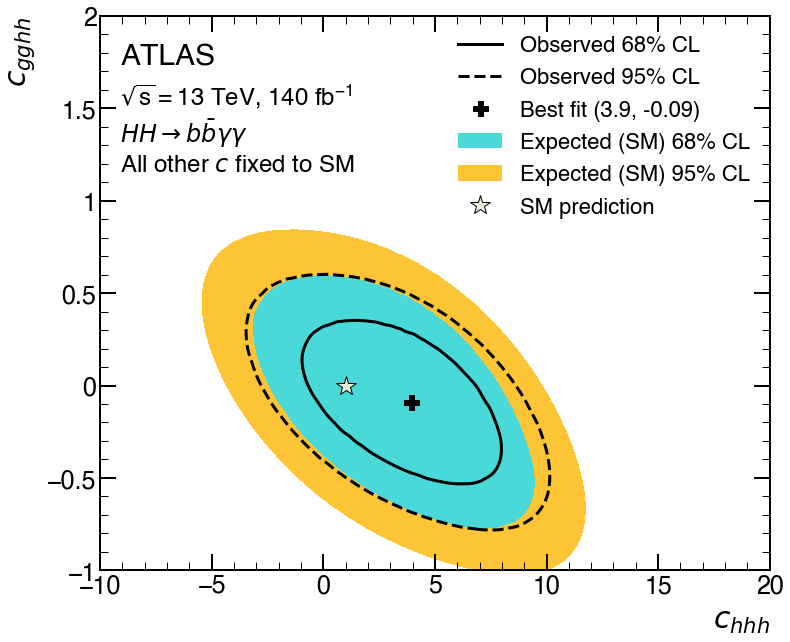

Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_2d_heft/likelihood_chhh_cgghh_bbtautau.pdf


<Figure size 640x480 with 0 Axes>

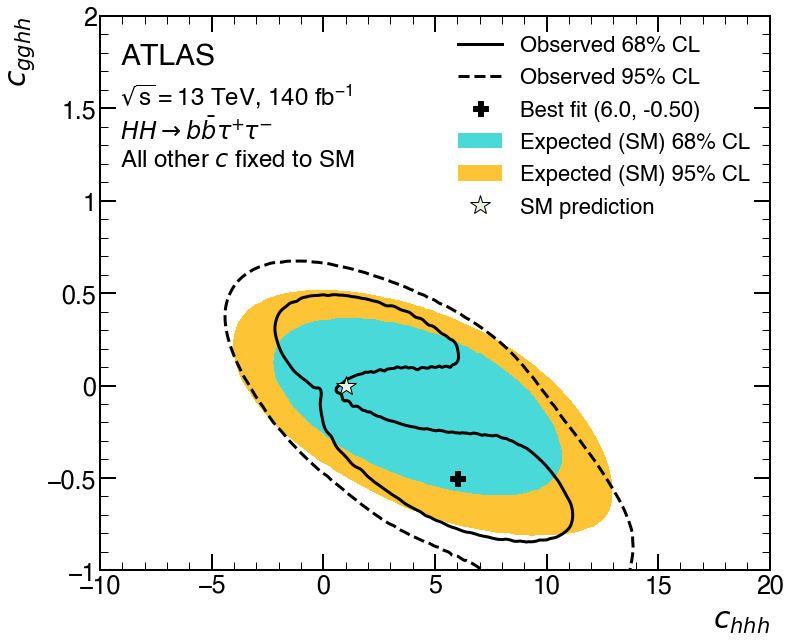

Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_2d_heft/likelihood_chhh_cgghh_bbbb.pdf


<Figure size 640x480 with 0 Axes>

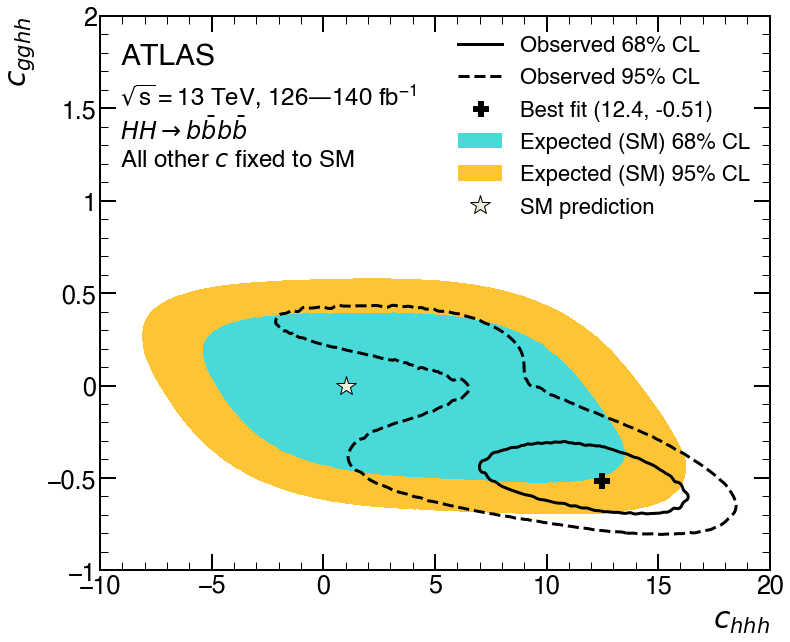

Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_2d_heft/likelihood_chhh_cgghh_combined.pdf


<Figure size 640x480 with 0 Axes>

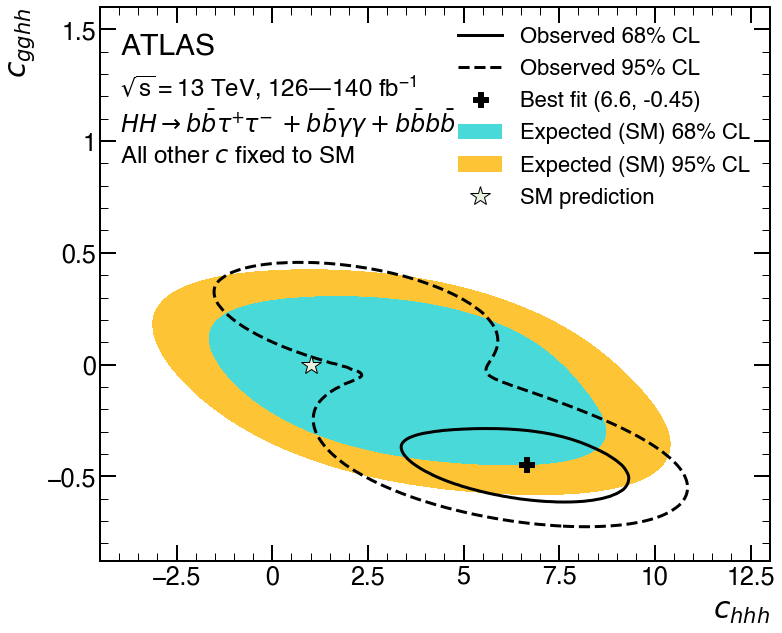

In [4]:
params = ('chhh', 'cgghh')
plotdir = set_plotdir(output_dir)

from quickstats.plots import Likelihood2DPlot
channels = ['bbyy', 'bbtautau', 'bbbb'] + ['combined']
styles = {'legend':{'loc': 'upper right',
                    'fontsize': 22},
          'xlabel': {'fontsize': 30},
          'ylabel': {'fontsize': 30},
          'text': {'fontsize': 24},
          'axis':{'labelsize': 25},
          'figure': {'figsize': (12,10), 'dpi': 72}}

config_map = {
    'exp': {
        'contourf_styles': {
            'colors': ["#4AD9D9", "#FDC536",'#FFA07A'],
            'alpha': 1
        },
        'fill_contour': True,
        'legend_label': 'Expected (SM) {sigma_label}',
        'bestfit_label': 'Expected best fit ({x:.1f}, {y:.2f})',            
    },
    'obs': {
        'bestfit_styles': {
            'marker': 'P',
            'linewidth': 0,
            'markersize': 15,
            'color': 'k'
        },
        'contour_styles': {
            'colors': ["k", "k", "k"],
            'linestyles': ['solid', 'dashed', 'dotted'],
            'linewidths': 3
        },
        'legend_label': 'Observed {sigma_label}',
        'bestfit_label': 'Best fit ({x:.1f}, {y:.2f})',
        # 'interpolation': 'linear'
    }
}
dfs_all = {}
for c in channels:
    if c=='combined': rangec = {'xmin': -4.5, 'xmax': 13, 'ymin': -0.88, 'ymax': 1.6}
    else: rangec = {'xmin': -10, 'xmax': 20, 'ymin': -1, 'ymax': 2}
    analysis_label_options = default_analysis_label_options
    analysis_label_options['extra_text'] = channel_text[c] + "//" + r"All other $\mathit{c}$ fixed to SM"
    if c in ['bbyy','bbtautau']: analysis_label_options['lumi'] = '140 fb$^{-1}$'
    else: analysis_label_options['lumi'] = '126—140 fb$^{-1}$'
    dfs = {}
    data_obs = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_obs',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['obs'] = pd.DataFrame(data_obs)
    data_exp = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_exp',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['exp'] = pd.DataFrame(data_exp)
    dfs_all[c] = dfs
    plotter = Likelihood2DPlot(dfs, config_map=config_map, styles=styles,
                               analysis_label_options=analysis_label_options)
    plotter.add_highlight(1, 0, label="SM prediction")
    ax = plotter.draw(xattrib=params[0], yattrib=params[1],
                      targets=['obs','exp'],
                      xlabel=name_map[params[0]],
                      ylabel=name_map[params[1]],
                      draw_bestfit=['obs'],
                      interval_format='68_95',**rangec)
    os.makedirs(os.path.join(plotdir, f'{status}/likelihood_2d_heft'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/likelihood_2d_heft', f"likelihood_{params[0]}_{params[1]}_{c}.pdf")
    print('Save to', filename)
    plt.savefig(filename)
    plt.show()


Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_2d_heft/likelihood_chhh_ctthh_bbyy.pdf


<Figure size 640x480 with 0 Axes>

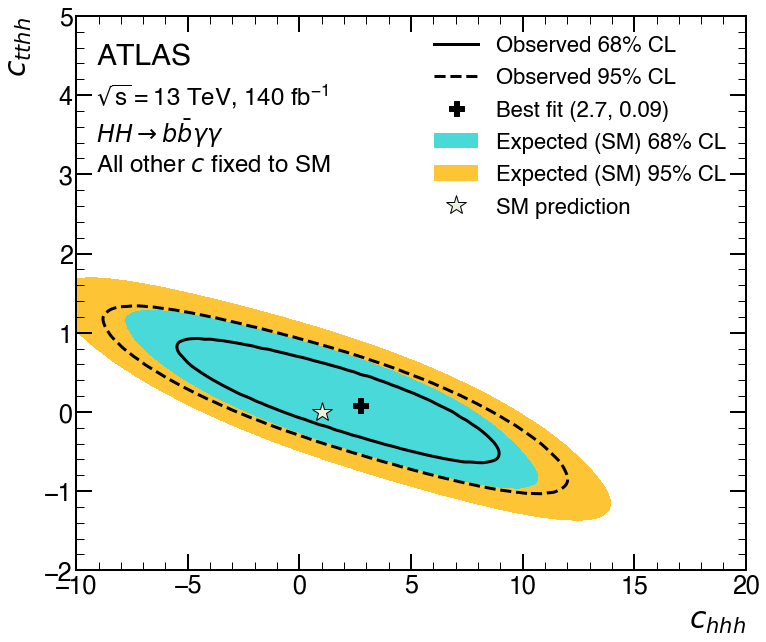

Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_2d_heft/likelihood_chhh_ctthh_bbtautau.pdf


<Figure size 640x480 with 0 Axes>

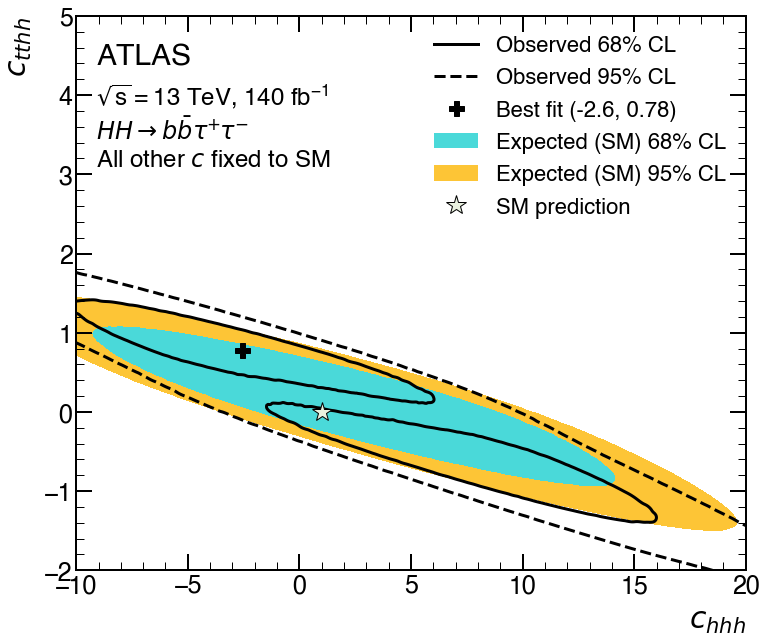

Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_2d_heft/likelihood_chhh_ctthh_bbbb.pdf


<Figure size 640x480 with 0 Axes>

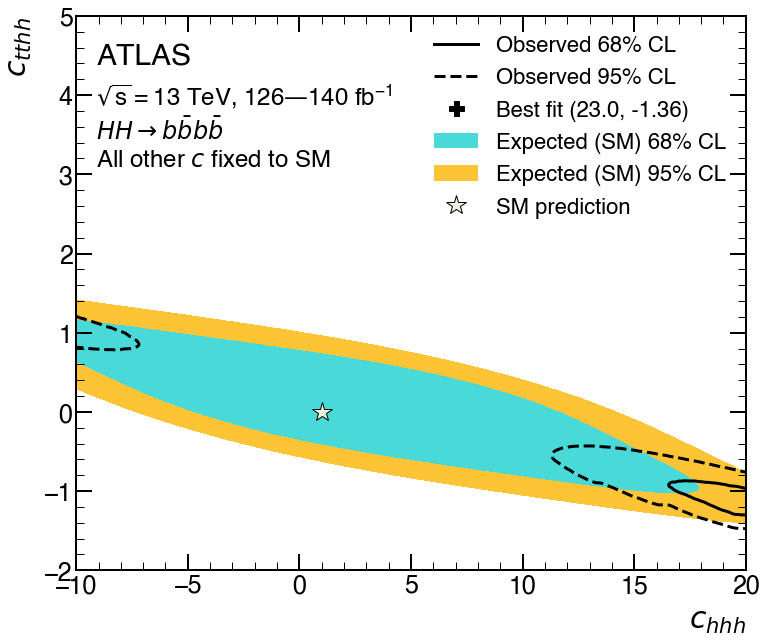

Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_2d_heft/likelihood_chhh_ctthh_combined.pdf


<Figure size 640x480 with 0 Axes>

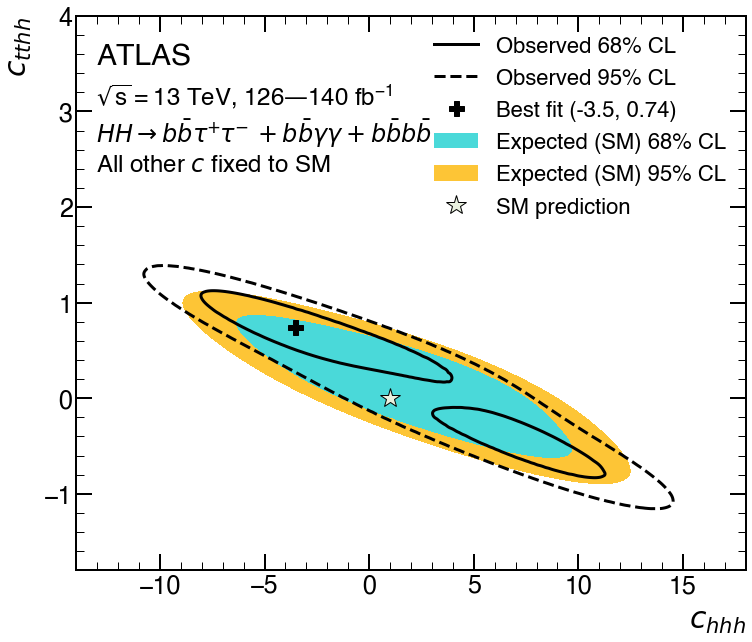

In [5]:
params = ('chhh', 'ctthh')
plotdir = set_plotdir(output_dir)
config_map = {
    'exp': {
        'contourf_styles': {
            'colors': ["#4AD9D9", "#FDC536",'#FFA07A'],
            'alpha': 1
        },
        'fill_contour': True,
        'legend_label': 'Expected (SM) {sigma_label}',
        'bestfit_label': 'Expected best fit ({x:.1f}, {y:.2f})',            
    },
    'obs': {
        'bestfit_styles': {
            'marker': 'P',
            'linewidth': 0,
            'markersize': 15,
            'color': 'k'
        },
        'contour_styles': {
            'colors': ["k", "k", "k"],
            'linestyles': ['solid', 'dashed', 'dotted'],
            'linewidths': 3
        },
        'legend_label': 'Observed {sigma_label}',
        'bestfit_label': 'Best fit ({x:.1f}, {y:.2f})',
        # 'interpolation': 'linear'
    }
}

from quickstats.plots import Likelihood2DPlot
channels = ['bbyy', 'bbtautau', 'bbbb'] + ['combined']
styles = {'legend':{'loc': 'upper right',
                    'fontsize': 22},
          'xlabel': {'fontsize': 30},
          'ylabel': {'fontsize': 30},
          'text': {'fontsize': 24},
          'axis':{'labelsize': 25},
          'figure': {'figsize': (12,10), 'dpi': 72}}

dfs_all = {}
for c in channels:
    if c=='combined': rangec = {'xmin': -14, 'xmax': 18, 'ymin': -1.8, 'ymax': 4}
    else: rangec = {'xmin': -10, 'xmax': 20, 'ymin': -2, 'ymax': 5}
    analysis_label_options = default_analysis_label_options
    analysis_label_options['extra_text'] = channel_text[c] + "//" + r"All other $\mathit{c}$ fixed to SM"
    if c in ['bbyy','bbtautau']: analysis_label_options['lumi'] = '140 fb$^{-1}$'
    else: analysis_label_options['lumi'] = '126—140 fb$^{-1}$'
    dfs = {}
    data_obs = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_obs',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['obs'] = pd.DataFrame(data_obs)
    data_exp = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_exp',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['exp'] = pd.DataFrame(data_exp)
    dfs_all[c] = dfs
    plotter = Likelihood2DPlot(dfs, config_map=config_map, styles=styles,
                               analysis_label_options=analysis_label_options)
    plotter.add_highlight(1, 0, label="SM prediction")
    ax = plotter.draw(xattrib=params[0], yattrib=params[1],
                      targets=['obs','exp'],
                      xlabel=name_map[params[0]],
                      ylabel=name_map[params[1]],
                      draw_bestfit=['obs'],
                      interval_format='68_95',**rangec)
    os.makedirs(os.path.join(plotdir, f'{status}/likelihood_2d_heft'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/likelihood_2d_heft', f"likelihood_{params[0]}_{params[1]}_{c}.pdf")
    print('Save to', filename)
    plt.savefig(filename)
    plt.show()



In [ ]:
# styles = {'legend':{'loc': 'upper right',
#                     'fontsize': 22},
#           'xlabel': {'fontsize': 30},
#           'ylabel': {'fontsize': 30},
#           'text': {'fontsize': 24},
#           'axis':{'labelsize': 25},
#           'figure': {'figsize': (12,10), 'dpi': 72}}
# config_map = {
#     'exp': {
#         'contour_styles': {
#             'colors': ["k","k"],
#             'linestyles': ['dashed','solid'],
#             'linewidths': 3
#         },
#         'legend_label': 'Expected {sigma_label}',
#         'bestfit_label': 'Expected best fit ({x:.1f}, {y:.2f})',            
#     },
#     'obs': {
#         # 'contourf_styles': {
#         #     'colors': ["#FDC536","#4AD9D9"],
#         #     'alpha': 1
#         # },
#         # 'fill_contour': True,
#         'contour_styles': {
#             'colors': ["k","k"],
#             'linestyles': ['solid','solid'],
#             'linewidths': 3
#         },
#         'bestfit_styles': {
#             'marker': 'P',
#             'linewidth': 0,
#             'markersize': 15,
#             'color': 'k'
#         },
#         'legend_label': 'Observed {sigma_label}',
#         'bestfit_label': 'Best fit ({x:.1f}, {y:.2f})',
#     }
# }
# rangec = {'xmin': -11, 'xmax': 16, 'ymin': -2, 'ymax': 4}
# plotter = Likelihood2DPlot(dfs_all['combined'], config={"interval_formats": {"95": ['0.95']}}, config_map=config_map, styles=styles, analysis_label_options=analysis_label_options)
# plotter.add_highlight(1, 0, label="SM prediction")
# ax = plotter.draw(xattrib=params[0], yattrib=params[1],
#                   targets=['obs','exp'],
#                   xlabel=name_map[params[0]],
#                   ylabel=name_map[params[1]],
#                   draw_bestfit=['obs'],
#                   interval_format='95',**rangec)
# lines = []
# for c in ['bbyy', 'bbtautau', 'bbbb']:
#     plotter.draw_single_data(ax, dfs_all[c]['exp'], xattrib=params[0], yattrib=params[1], interval_format='95',config={'contour_styles':{'colors':styles_map[c]['color'],'linestyles':'dashed'},'fill_contour':False,'legend_label':'','interpolation':'cubic'})
#     line, = ax.plot([], [], '--', linewidth=2, color=styles_map[c]['color'], label=channel_label_map[c])
#     lines.append(line)
# ax.add_artist(ax.get_legend())
# ax.legend(handles=lines, loc=(0.76, 0.53), fontsize=20, handleheight=1.5)
# filename = os.path.join(plotdir, f'{status}/likelihood_2d', f"likelihood_{params[0]}_{params[1]}.pdf")
# print('Save to', filename)
# plt.savefig(filename)
# plt.show()

Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_2d_heft/likelihood_cgghh_ctthh_bbyy.pdf


<Figure size 640x480 with 0 Axes>

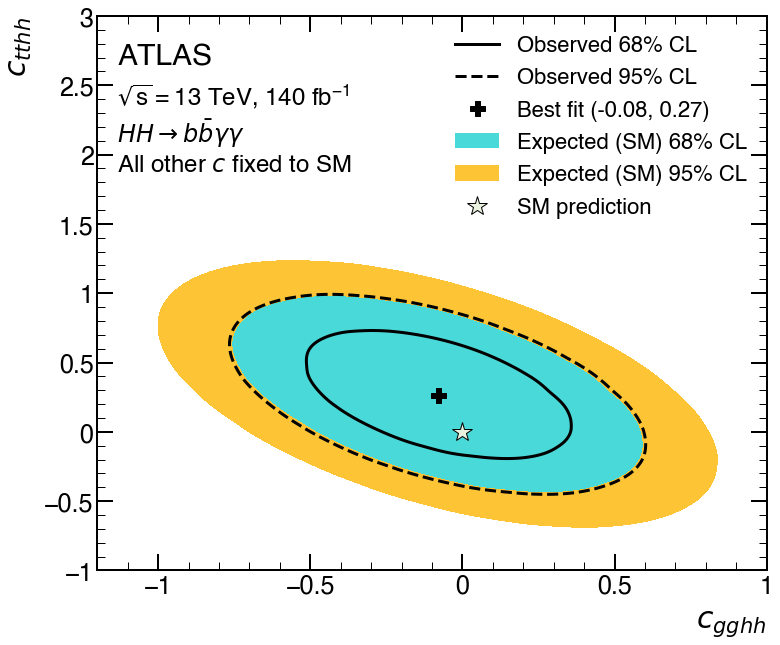

Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_2d_heft/likelihood_cgghh_ctthh_bbtautau.pdf


<Figure size 640x480 with 0 Axes>

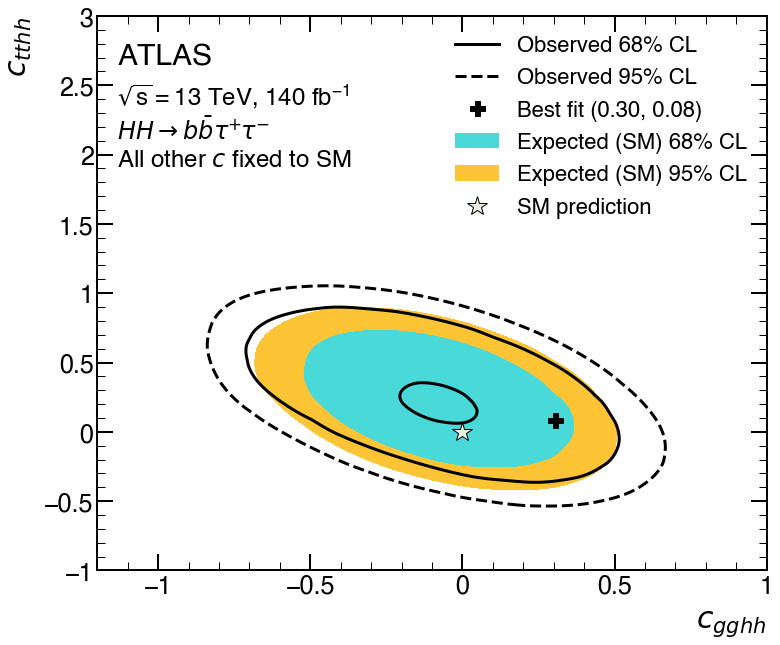

Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_2d_heft/likelihood_cgghh_ctthh_bbbb.pdf


<Figure size 640x480 with 0 Axes>

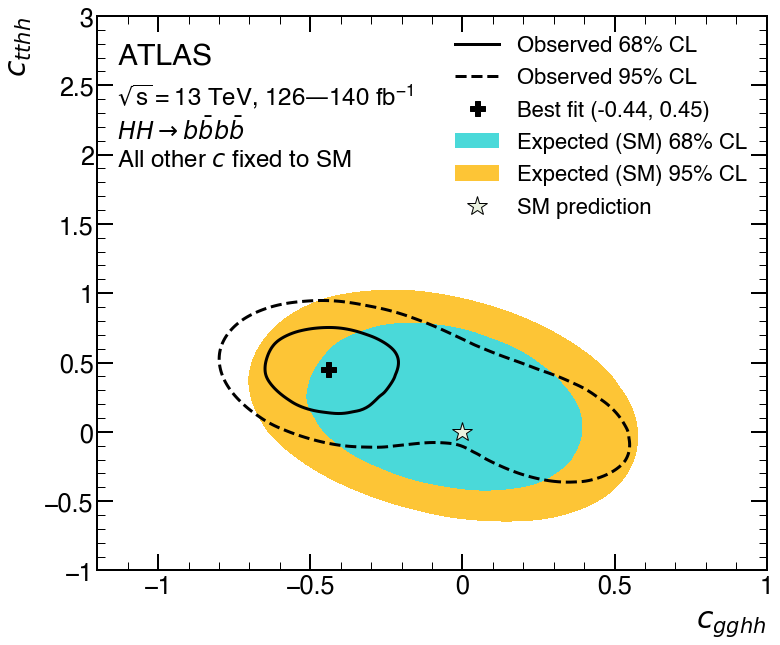

Save to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/likelihood_2d_heft/likelihood_cgghh_ctthh_combined.pdf


<Figure size 640x480 with 0 Axes>

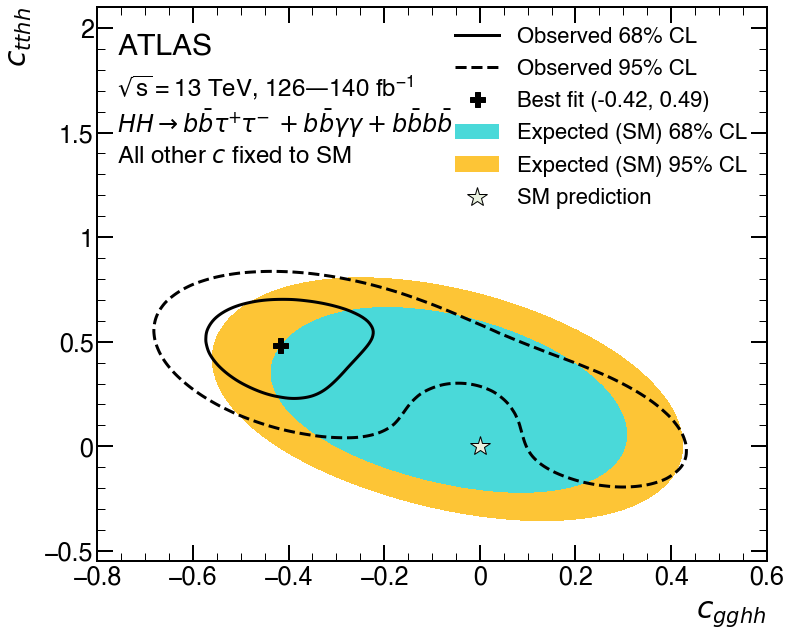

In [6]:
params = ('cgghh', 'ctthh')
plotdir = set_plotdir(output_dir)
config_map = {
    'exp': {
        'contourf_styles': {
            'colors': ["#4AD9D9", "#FDC536",'#FFA07A'],
            'alpha': 1
        },
        'fill_contour': True,
        'legend_label': 'Expected (SM) {sigma_label}',
        'bestfit_label': 'Expected best fit ({x:.2f}, {y:.2f})',            
    },
    'obs': {
        'bestfit_styles': {
            'marker': 'P',
            'linewidth': 0,
            'markersize': 15,
            'color': 'k'
        },
        'contour_styles': {
            'colors': ["k", "k", "k"],
            'linestyles': ['solid', 'dashed', 'dotted'],
            'linewidths': 3
        },
        'legend_label': 'Observed {sigma_label}',
        'bestfit_label': 'Best fit ({x:.2f}, {y:.2f})',
        # 'interpolation': 'linear'
    }
}

from quickstats.plots import Likelihood2DPlot
channels = ['bbyy', 'bbtautau', 'bbbb'] + ['combined']
styles = {'legend':{'loc': 'upper right',
                    'fontsize': 22},
          'xlabel': {'fontsize': 30},
          'ylabel': {'fontsize': 30},
          'text': {'fontsize': 24},
          'axis':{'labelsize': 25},
          'figure': {'figsize': (12,10), 'dpi': 72}}

dfs_all = {}
for c in channels:
    if c=='combined': rangec = {'xmin': -0.8, 'xmax': 0.6, 'ymin': -0.55, 'ymax': 2.1}
    else: rangec = {'xmin': -1.2, 'xmax': 1, 'ymin': -1, 'ymax': 3}
    analysis_label_options = default_analysis_label_options
    analysis_label_options['extra_text'] = channel_text[c] + "//" + r"All other $\mathit{c}$ fixed to SM"
    if c in ['bbyy','bbtautau']: analysis_label_options['lumi'] = '140 fb$^{-1}$'
    else: analysis_label_options['lumi'] = '126—140 fb$^{-1}$'
    dfs = {}
    data_obs = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_obs',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['obs'] = pd.DataFrame(data_obs)
    data_exp = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_exp',f'likelihoods_{params[0]}_{params[1]}.json')))
    dfs['exp'] = pd.DataFrame(data_exp)
    dfs_all[c] = dfs
    plotter = Likelihood2DPlot(dfs, config_map=config_map, styles=styles,
                               analysis_label_options=analysis_label_options)
    plotter.add_highlight(0, 0, label="SM prediction")
    ax = plotter.draw(xattrib=params[0], yattrib=params[1],
                      targets=['obs','exp'],
                      xlabel=name_map[params[0]],
                      ylabel=name_map[params[1]],
                      draw_bestfit=['obs'],
                      interval_format='68_95',**rangec)
    os.makedirs(os.path.join(plotdir, f'{status}/likelihood_2d_heft'), exist_ok=True)
    filename = os.path.join(plotdir, f'{status}/likelihood_2d_heft', f"likelihood_{params[0]}_{params[1]}_{c}.pdf")
    print('Save to', filename)
    plt.savefig(filename)
    plt.show()


In [8]:
from typing import Optional, Dict, List

import numpy as np

SCALE_GGF_KL  = {
    125 : 31.05/(70.3874 - 50.4111 + 11.0595),
    125.09 : 31.02/(70.3874 - 50.4111 + 11.0595),
    125.4 : 30.82/(70.3874 - 50.4111 + 11.0595)    
}

class HEFTXS:
    
    DEFAULT_COEFFICIENTS = (62.4026336568,
                            344.8068589056,
                            9.6151130789,
                            9.7924812800,
                            351.7609965122,
                            -268.6369098975,
                            -44.1858648211,
                            96.3284178194,
                            80.3578393535,
                            466.4328720374,
                            -35.2906404279,
                            -163.8576045017,
                            18.3369161655,
                            80.3378763535,
                            87.9907108439,
                            -0.2292902802,
                            0.5829126704,
                            0.4713946837,
                            0.8104480635,
                            -0.7606517422,
                            2.0347523220,
                            0.4053251961,
                            3.2468181114)
    
    def __init__(self, s:float=13, mH:float=125,
                 coefficients:Optional[np.ndarray]=None):
        self.s = s
        self.mH = mH
        self.set_coefficients(coefficients)
        
    def set_coefficients(self, coefficients:Optional[np.ndarray]=None):
        if coefficients is not None:
            self.coefficients = np.array(coefficients)
        else:
            self.coefficients = np.array(self.DEFAULT_COEFFICIENTS)
        assert len(self.coefficients) == 23
        
    @staticmethod
    def xs_ggF_kl(kl:float, mH:float=125):
        #https://twiki.cern.ch/twiki/bin/view/LHCPhysics/LHCHWGHH?redirectedfrom=LHCPhysics.LHCHXSWGHH#Latest_recommendations_for_gluon
        return (70.3874 - 50.4111 * kl + 11.0595 * kl**2) * SCALE_GGF_KL[mH] #XS in fbv
        
    # When adding 2 independent Gaussians (e.g. ggF and VBF XS) we can simply add their means and add their sigmas in quadrature
    def sigma_upper_chhh(self, chhh:float):
        #https://twiki.cern.ch/twiki/bin/view/LHCPhysics/LHCHWGHH?redirectedfrom=LHCPhysics.LHCHXSWGHH#Latest_recommendations_for_gluon
        #add the std on ggF HH due to qcd scale, PDF, and mtop in quadrature
        #return xs_ggF(kl) * math.sqrt((max(72.0744-51.7362*kl+11.3712*kl**2, 70.9286-51.5708*kl+11.4497*kl**2) * SCALE_GGF / xs_ggF(kl) - 1)**2 + 0.03**2 + 0.026**2)
        #new mtop uncertainty:
        result = (self.get_xs(chhh=chhh)[-1] *
                  np.sqrt((np.maximum(76.6075 - 56.4818*chhh + 12.635*chhh**2, 75.4617 - 56.3164*chhh + 12.7135*chhh**2) *
                             SCALE_GGF_KL[self.mH] / self.xs_ggF_kl(kl=chhh, mH=self.mH) - 1)**2 + 0.03**2))
        return result

    def sigma_lower_chhh(self, chhh:float):
        #https://twiki.cern.ch/twiki/bin/view/LHCPhysics/LHCHWGHH?redirectedfrom=LHCPhysics.LHCHXSWGHH#Latest_recommendations_for_gluon
        #add the std on ggF HH due to qcd scale, PDF, and mtop in quadrature
        #return xs_ggF(kl) * math.sqrt((min(66.0621-46.7458*kl+10.1673*kl**2, 66.7581-47.721*kl+10.4535*kl**2) * SCALE_GGF / xs_ggF(kl) - 1)**2 + 0.03**2 + 0.026**2)
        #new mtop uncertainty:
        result = (self.get_xs(chhh=chhh)[-1] *
                  np.sqrt((np.minimum(57.6809 - 42.9905*chhh + 9.58474*chhh**2, 58.3769 - 43.9657*chhh + 9.87094*chhh**2) *
                             SCALE_GGF_KL[self.mH] / self.xs_ggF_kl(kl=chhh, mH=self.mH) - 1)**2 + 0.03**2))
        return result
    
    def xs_upper_chhh(self, chhh:float):
        return self.get_xs(chhh=chhh)[-1] + self.sigma_upper_chhh(chhh)

    def xs_lower_chhh(self, chhh:float):
        return self.get_xs(chhh=chhh)[-1] - self.sigma_lower_chhh(chhh)
    
    def get_poly(self, ctthh:np.ndarray=0, cgghh:np.ndarray=0,
                 cggh:np.ndarray=0, chhh:np.ndarray=1, ctth:np.ndarray=1):
        ctt   = np.array(ctthh)
        cgghh = np.array(cgghh)
        cggh  = np.array(cggh)
        chhh  = np.array(chhh)
        ct    = np.array(ctth)
        A = self.coefficients
        poly = (  A[0] * np.power(ct, 4) 
                + A[1] * np.power(ctt, 2) 
                + A[2] * np.power(ct, 2) * np.power(chhh, 2) 
                + A[3] * np.power(cggh, 2) * np.power(chhh, 2) 
                + A[4] * np.power(cgghh, 2) 
                + A[5] * ctt * np.power(ct, 2) 
                + A[6] * np.power(ct, 3) * chhh 
                + A[7] * ctt * ct * chhh 
                + A[8] * ctt * cggh * chhh 
                + A[9] * ctt * cgghh 
                + A[10] * np.power(ct, 2) * cggh * chhh 
                + A[11] * np.power(ct, 2) * cgghh 
                + A[12] * ct * np.power(chhh, 2) * cggh 
                + A[13] * ct * chhh * cgghh 
                + A[14] * cggh * chhh * cgghh 
                + A[15] * np.power(ct, 3) * cggh 
                + A[16] * ct * ctt * cggh 
                + A[17] * ct * np.power(cggh, 2)*chhh 
                + A[18] * ct * cggh * cgghh 
                + A[19] * np.power(ct, 2) * np.power(cggh, 2) 
                + A[20] * ctt * np.power(cggh, 2) 
                + A[21] * np.power(cggh, 3) * chhh 
                + A[22] * np.power(cggh, 2) * cgghh)
        return poly
    
    def get_xs(self, ctthh:np.ndarray=0, cgghh:np.ndarray=0,
               cggh:np.ndarray=0, chhh:np.ndarray=1, ctth:np.ndarray=1):
        poly = self.get_poly(ctthh=ctthh, cgghh=cgghh, cggh=cggh, chhh=chhh, ctth=ctth)
        poly_sm = self.get_poly()
        xs = poly * 31.05 / poly_sm
        #return ctthh, cgghh, cggh, chhh, ctth, xs, xs * (1 - 0.217834), xs * (1 + 0.055578)
        return ctthh, cgghh, cggh, chhh, ctth, xs
    
    def get_coupling_xs(self, coupling:str, values:Optional[np.ndarray]=None,
                        vmin:Optional[float]=None, vmax:Optional[float]=None, size:int=1000):
        couplings_values = {
            'ctthh': 0,
            'cgghh': 0,
            'cggh': 0,
            'chhh': 1,
            'ctth': 1
        }
        if coupling not in couplings_values:
            raise ValueError(f'invalid HEFT coupling: {coupling}')
        if (values is None) and ((vmin is None) or (vmax is None)):
            raise ValueError('either coupling values or its ranges must be specified')
        elif (values is not None) and ((vmin is None) and (vmax is None)):
            coupling_values = np.array(values)
        elif (values is None) and ((vmin is not None) and (vmax is not None)):
            coupling_values = np.linspace(vmin, vmax, size)
        else:
            raise ValueError('cannot specify both coupling values and its ranges')
        couplings_values[coupling] = coupling_values
        xs = self.get_xs(**couplings_values)[-1]
        if coupling == 'chhh':
            y_errhi = self.xs_upper_chhh(coupling_values)
            y_errlo = self.xs_lower_chhh(coupling_values)
            return coupling_values, xs, y_errlo, y_errhi
        return coupling_values, xs

SM obs: 123.21650519115208 exp: 155.39327349875424
Theo SM 31.050000000000004
1 obs: 344.82899457447286 exp: 390.298338144823
Theo 1 105.57532777703075
2 obs: 250.58124928811637 exp: 298.0428334282723
Theo 2 115.86904856652954
3 obs: 100.83104203125737 exp: 130.4939602118215
Theo 3 140.1050405273869
4 obs: 110.40347096147502 exp: 140.9308032010904
Theo 4 173.08816253580594
5 obs: 89.29842229782575 exp: 115.45850326846906
Theo 5 143.7804103916967
6 obs: 131.4153175223956 exp: 165.98585896692376
Theo 6 101.25077732333628
7 obs: 82.04952238020643 exp: 106.19872270193117
Theo 7 120.2623554721765
Saving to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/limit/limit_BMs_bbyy.pdf


<Figure size 640x480 with 0 Axes>

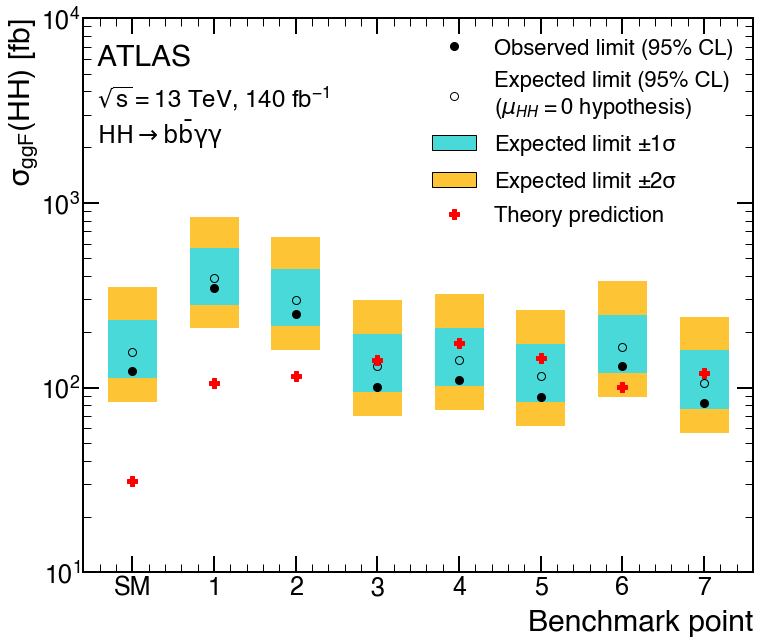

In [10]:
from quickstats.plots import UpperLimitBenchmarkPlot
import os,json
from quickstats.utils.common_utils import combine_dict
import pandas as pd
import matplotlib.pyplot as plt
channel = 'bbyy'

extra_text = r'$\mathrm{HH\rightarrow b\bar{b}\gamma\gamma}$'

basedir = output_dir
           
benchmarks = ['SM', '1', '2', '3', '4', '5', '6', '7']
benchmark_points = {'SM': [0,0,0,1,1],
                    '1': [0,0,0,5.11,1.1],
                    '2': [1/6,0,-1/3,6.84,1.03],
                    '3': [-1/3,0.5,0.5,2.21,1.05],
                    '4': [-1/6,-0.5,-1/3,2.79,0.9],
                    '5': [-1/3,-0.5,1/6,3.95,1.17],
                    '6': [-1/6,0.25,0.5,-0.68,0.9],
                    '7': [1,-1/6,1/6,-0.1,0.94]}
scenarios = ['stat_only', 'full_syst', 'no_eft_syst']
stages = ['blind', 'unblind']
stage_map = {
    'blind': 'Blind',
    'unblind': 'Unblind'
}
scenario_map = {
    'full_syst': 'Full syst',
    'stat_only': 'Stat only',
    'no_eft_syst': 'No EFT syst'
}
ylabel= "$\sigma_{ggF}(HH)$ [fb]"
ylim = (10, 1e4)
labels = {
    'expected': 'Expected limit (95% CL)\n'+r'($\mathit{\mu_{HH}} = 0$ hypothesis)',
    'observed': 'Observed limit (95% CL)'
}

styles = {
    'legend': {
        'loc': 'upper right',
        'fontsize': 22
    },
    'errorbar':{
        'markersize': 8
    },
    'ratio_frames':{
        'height_ratios': (4, 1),
        'hspace': 0.07            
    },
    'axis': {
        'labelsize': 25
    },
    'xlabel': {
        'fontsize': 30
    },
    'ylabel': {
        'fontsize': 30
    },
    'text': {'fontsize': 24},
    'figure': {'figsize': (12,10), 'dpi': 72}
}

custom_styles = {
    'theory': {
        'marker': 'P',
        'markersize': 10
    }
}
color_pallete = {
    'theory': 'r'
}
xs_tool = HEFTXS()
df_combined = None
benchmarks_to_plot = []
for benchmark in benchmarks:
    filename = os.path.join(basedir, f"limit/heft/{channel}/BM{benchmark}", f"limits_mu_HH.json")
    if benchmark=="SM": filename = os.path.join(basedir, f"limit/heft/{channel}/BM0", f"limits_mu_HH.json")
    if not os.path.exists(filename):
        print(f"Benchmark {benchmark} does not exist")
        continue
    benchmarks_to_plot.append(benchmark)
    data = json.load(open(filename))
    for j,param in enumerate(['ctthh', 'cgghh', 'cggh', 'chhh', 'ctth']):
        data[param] = benchmark_points[benchmark][j]
    df = pd.DataFrame(data)
    print(benchmark, 'obs:', data['obs'][0]*xs_tool.get_xs(*benchmark_points[benchmark])[-1], 'exp:', data['0'][0]*xs_tool.get_xs(*benchmark_points[benchmark])[-1])
    print("Theo",benchmark,xs_tool.get_xs(*benchmark_points[benchmark])[-1])
    if df_combined is None:
        df_combined = df
    else:
        df_combined = pd.concat([df_combined, df])
df_combined = df_combined.set_index(['ctthh', 'cgghh', 'cggh', 'chhh', 'ctth'])
analysis_label_options = {'loc': (0.02, 0.95),
                          'fontsize':30, 'energy': '13 TeV',
                          'lumi': '140 fb$^{-1}$', 'dy': 0.01, 'dy_main': 0.01,
                          'extra_text': extra_text}
analysis_label_options_ = combine_dict(analysis_label_options)
analysis_label_options_['status'] = status
plotter = UpperLimitBenchmarkPlot(df_combined, styles=styles,labels=labels, 
                                  theory_func=xs_tool.get_xs,
                                  custom_styles=custom_styles,
                                  color_pallete=color_pallete,
                                  analysis_label_options=analysis_label_options_)
plotter.draw(xlabel='Benchmark point', ylabel=ylabel,
             xticklabels=benchmarks_to_plot, logy=True, ylim=ylim, scale_theory=True,
             draw_observed=True, draw_theory=True)
outpath = os.path.join(basedir,"figures", status, "limit", f"limit_BMs_{channel}.pdf")
dirname = os.path.dirname(outpath)
if not os.path.exists(dirname):
    os.makedirs(dirname)
print(f"Saving to {outpath}")
plt.savefig(outpath,)
df_combined.to_csv(outpath.replace('.pdf', '.csv'))
plt.show()

SM obs: 158.405627577573 exp: 93.6404600986123
Theo SM 31.050000000000004
1 obs: 733.790658998651 exp: 497.18596438635836
Theo 1 105.57532777703075
2 obs: 388.02981709140477 exp: 247.24485837954566
Theo 2 115.86904856652954
3 obs: 99.05161834167615 exp: 52.485282175151305
Theo 3 140.1050405273869
4 obs: 127.84569847861998 exp: 68.48339664847255
Theo 4 173.08816253580594
5 obs: 95.73142473043384 exp: 51.941196352921594
Theo 5 143.7804103916967
6 obs: 158.0288595911745 exp: 88.81991307324267
Theo 6 101.25077732333628
7 obs: 86.40742744886305 exp: 45.42368524502515
Theo 7 120.2623554721765
Saving to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/limit/limit_BMs_bbtautau.pdf


<Figure size 640x480 with 0 Axes>

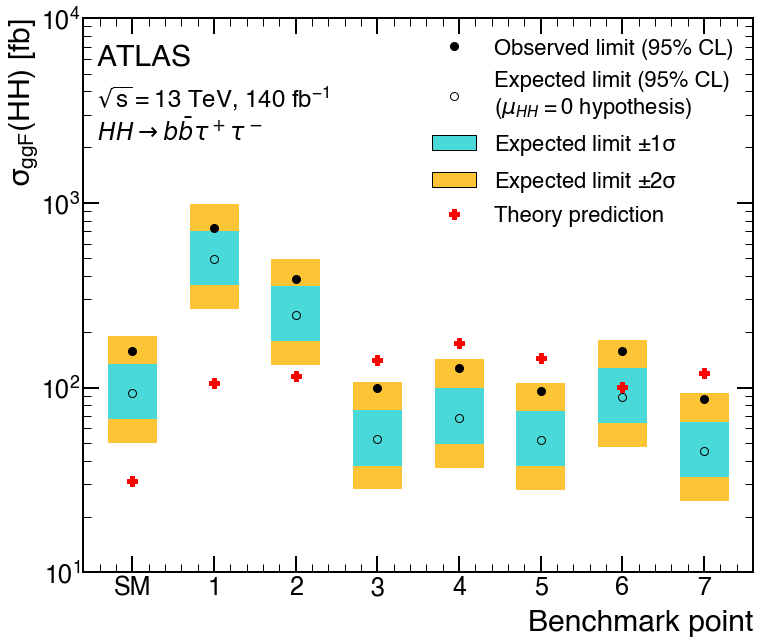

In [11]:
from quickstats.plots import UpperLimitBenchmarkPlot
import os,json
from quickstats.utils.common_utils import combine_dict
import pandas as pd
import matplotlib.pyplot as plt
channel = 'bbtautau'

extra_text = r'$\mathit{HH\rightarrow b\bar{b}\tau^+\tau^-}$'
basedir = output_dir

benchmarks = ['SM', '1', '2', '3', '4', '5', '6', '7']
benchmark_points = {'SM': [0,0,0,1,1],
                    '1': [0,0,0,5.11,1.1],
                    '2': [1/6,0,-1/3,6.84,1.03],
                    '3': [-1/3,0.5,0.5,2.21,1.05],
                    '4': [-1/6,-0.5,-1/3,2.79,0.9],
                    '5': [-1/3,-0.5,1/6,3.95,1.17],
                    '6': [-1/6,0.25,0.5,-0.68,0.9],
                    '7': [1,-1/6,1/6,-0.1,0.94]}
scenarios = ['stat_only', 'full_syst', 'no_eft_syst']
stages = ['blind', 'unblind']
stage_map = {
    'blind': 'Blind',
    'unblind': 'Unblind'
}
scenario_map = {
    'full_syst': 'Full syst',
    'stat_only': 'Stat only',
    'no_eft_syst': 'No EFT syst'
}
ylabel= "$\sigma_{ggF}(HH)$ [fb]"
ylim = (10, 1e4)

styles = {
    'legend': {
        'loc': 'upper right',
        'fontsize': 22
    },
    'errorbar':{
        'markersize': 8
    },
    'ratio_frames':{
        'height_ratios': (4, 1),
        'hspace': 0.07            
    },
    'axis': {
        'labelsize': 25
    },
    'xlabel': {
        'fontsize': 30
    },
    'ylabel': {
        'fontsize': 30
    },
    'text': {'fontsize': 24},
    'figure': {'figsize': (12,10), 'dpi': 72}
}

custom_styles = {
    'theory': {
        'marker': 'P',
        'markersize': 10
    }
}
color_pallete = {
    'theory': 'r'
}
xs_tool = HEFTXS()
df_combined = None
benchmarks_to_plot = []
for benchmark in benchmarks:
    filename = os.path.join(basedir, f"limit/heft/{channel}/BM{benchmark}", f"limits_mu_HH.json")
    if benchmark=="SM": filename = os.path.join(basedir, f"limit/heft/{channel}/BM0", f"limits_mu_HH.json")
    if not os.path.exists(filename):
        print(f"Benchmark {benchmark} does not exist")
        continue
    benchmarks_to_plot.append(benchmark)
    data = json.load(open(filename))
    for j,param in enumerate(['ctthh', 'cgghh', 'cggh', 'chhh', 'ctth']):
        data[param] = benchmark_points[benchmark][j]
    df = pd.DataFrame(data)
    print(benchmark, 'obs:', data['obs'][0]*xs_tool.get_xs(*benchmark_points[benchmark])[-1], 'exp:', data['0'][0]*xs_tool.get_xs(*benchmark_points[benchmark])[-1])
    print("Theo",benchmark,xs_tool.get_xs(*benchmark_points[benchmark])[-1])
    if df_combined is None:
        df_combined = df
    else:
        df_combined = pd.concat([df_combined, df])
df_combined = df_combined.set_index(['ctthh', 'cgghh', 'cggh', 'chhh', 'ctth'])
analysis_label_options = {'loc': (0.02, 0.95),
                          'fontsize':30, 'energy': '13 TeV',
                          'lumi': '140 fb$^{-1}$', 'dy': 0.01, 'dy_main': 0.01,
                          'extra_text': extra_text}
analysis_label_options_ = combine_dict(analysis_label_options)
analysis_label_options_['status'] = status
plotter = UpperLimitBenchmarkPlot(df_combined, styles=styles,labels=labels, 
                                  theory_func=xs_tool.get_xs,
                                  custom_styles=custom_styles,
                                  color_pallete=color_pallete,
                                  analysis_label_options=analysis_label_options_)
plotter.draw(xlabel='Benchmark point', ylabel=ylabel,
             xticklabels=benchmarks_to_plot, logy=True, ylim=ylim, scale_theory=True,
             draw_observed=True, draw_theory=True)
outpath = os.path.join(basedir,"figures", status, "limit", f"limit_BMs_{channel}.pdf")
dirname = os.path.dirname(outpath)
if not os.path.exists(dirname):
    os.makedirs(dirname)
print(f"Saving to {outpath}")
plt.savefig(outpath)
df_combined.to_csv(outpath.replace('.pdf', '.csv'))

SM obs: 164.72037473509744 exp: 233.0751495225904
Theo SM 31.050000000000004
1 obs: 2778.8403259167712 exp: 1444.0948639771161
Theo 1 105.57532777703075
2 obs: 1092.7305876981973 exp: 689.0959452582542
Theo 2 115.86904856652954
3 obs: 107.15920183560965 exp: 74.42431107963593
Theo 3 140.1050405273869
4 obs: 154.07564002996202 exp: 121.44182539682829
Theo 4 173.08816253580594
5 obs: 106.06271796282307 exp: 95.29536929739794
Theo 5 143.7804103916967
6 obs: 218.17354282871466 exp: 170.9136701517907
Theo 6 101.25077732333628
7 obs: 88.28779883547332 exp: 71.34266770342664
Theo 7 120.2623554721765
Saving to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/limit/limit_BMs_bbbb.pdf


<Figure size 640x480 with 0 Axes>

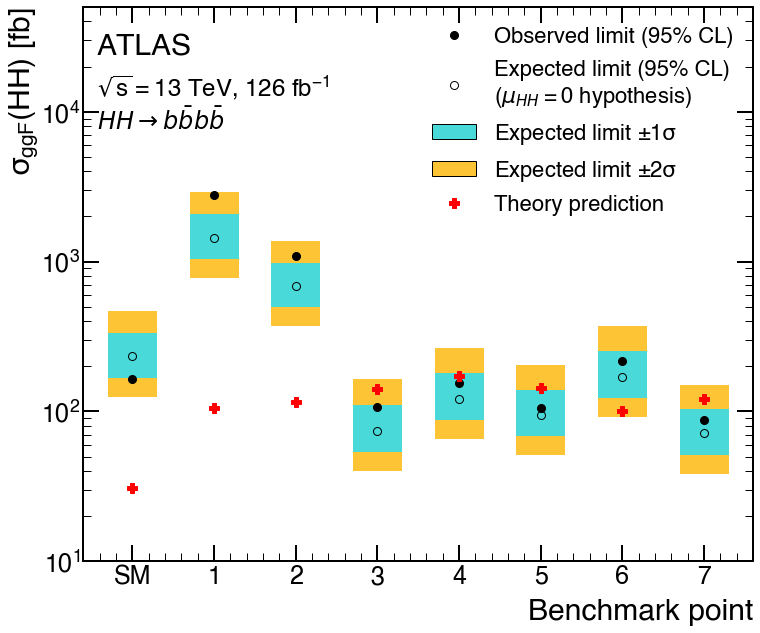

In [12]:
from quickstats.plots import UpperLimitBenchmarkPlot
import os,json
from quickstats.utils.common_utils import combine_dict
import pandas as pd
import matplotlib.pyplot as plt
channel = 'bbbb'

extra_text = r'$\mathit{HH\rightarrow b\bar{b}b\bar{b}}$'
basedir = output_dir

benchmarks = ['SM', '1', '2', '3', '4', '5', '6', '7']
benchmark_points = {'SM': [0,0,0,1,1],
                    '1': [0,0,0,5.11,1.1],
                    '2': [1/6,0,-1/3,6.84,1.03],
                    '3': [-1/3,0.5,0.5,2.21,1.05],
                    '4': [-1/6,-0.5,-1/3,2.79,0.9],
                    '5': [-1/3,-0.5,1/6,3.95,1.17],
                    '6': [-1/6,0.25,0.5,-0.68,0.9],
                    '7': [1,-1/6,1/6,-0.1,0.94]}
scenarios = ['stat_only', 'full_syst', 'no_eft_syst']
stages = ['blind', 'unblind']
stage_map = {
    'blind': 'Blind',
    'unblind': 'Unblind'
}
scenario_map = {
    'full_syst': 'Full syst',
    'stat_only': 'Stat only',
    'no_eft_syst': 'No EFT syst'
}
ylabel= "$\sigma_{ggF}(HH)$ [fb]"
ylim = (10, 5e4)

styles = {
    'legend': {
        'loc': 'upper right',
        'fontsize': 22
    },
    'errorbar':{
        'markersize': 8
    },
    'ratio_frames':{
        'height_ratios': (4, 1),
        'hspace': 0.07            
    },
    'axis': {
        'labelsize': 25
    },
    'xlabel': {
        'fontsize': 30
    },
    'ylabel': {
        'fontsize': 30
    },
    'text': {'fontsize': 24},
    'figure': {'figsize': (12,10), 'dpi': 72}
}

custom_styles = {
    'theory': {
        'marker': 'P',
        'markersize': 10
    }
}
color_pallete = {
    'theory': 'r'
}
xs_tool = HEFTXS()
df_combined = None
benchmarks_to_plot = []
for benchmark in benchmarks:
    filename = os.path.join(basedir, f"limit/heft/{channel}/BM{benchmark}", f"limits_mu_HH.json")
    if benchmark=="SM": filename = os.path.join(basedir, f"limit/heft/{channel}/BM0", f"limits_mu_HH.json")
    if not os.path.exists(filename):
        print(f"Benchmark {benchmark} does not exist")
        continue
    benchmarks_to_plot.append(benchmark)
    data = json.load(open(filename))
    for j,param in enumerate(['ctthh', 'cgghh', 'cggh', 'chhh', 'ctth']):
        data[param] = benchmark_points[benchmark][j]
    df = pd.DataFrame(data)
    print(benchmark, 'obs:', data['obs'][0]*xs_tool.get_xs(*benchmark_points[benchmark])[-1], 'exp:', data['0'][0]*xs_tool.get_xs(*benchmark_points[benchmark])[-1])
    print("Theo",benchmark,xs_tool.get_xs(*benchmark_points[benchmark])[-1])
    if df_combined is None:
        df_combined = df
    else:
        df_combined = pd.concat([df_combined, df])
df_combined = df_combined.set_index(['ctthh', 'cgghh', 'cggh', 'chhh', 'ctth'])
analysis_label_options = {'loc': (0.02, 0.95),
                          'fontsize':30, 'energy': '13 TeV',
                          'lumi': '126 fb$^{-1}$', 'dy': 0.01, 'dy_main': 0.01,
                          'extra_text': extra_text}
analysis_label_options_ = combine_dict(analysis_label_options)
analysis_label_options_['status'] = status
plotter = UpperLimitBenchmarkPlot(df_combined, styles=styles,labels=labels, 
                                  theory_func=xs_tool.get_xs,
                                  custom_styles=custom_styles,
                                  color_pallete=color_pallete,
                                  analysis_label_options=analysis_label_options_)
plotter.draw(xlabel='Benchmark point', ylabel=ylabel,
             xticklabels=benchmarks_to_plot, logy=True, ylim=ylim, scale_theory=True,
             draw_observed=True, draw_theory=True)
outpath = os.path.join(basedir,"figures", status, "limit", f"limit_BMs_{channel}.pdf")
dirname = os.path.dirname(outpath)
if not os.path.exists(dirname):
    os.makedirs(dirname)
print(f"Saving to {outpath}")
plt.savefig(outpath)
df_combined.to_csv(outpath.replace('.pdf', '.csv'))

SM obs: 87.50358975622991 exp: 72.18347181225751
Theo SM 31.050000000000004
1 obs: 544.6283336210943 exp: 294.39067440937987
Theo 1 105.57532777703075
2 obs: 294.191391996421 exp: 176.47719420015665
Theo 2 115.86904856652954
3 obs: 72.37146834134899 exp: 38.39111794145161
Theo 3 140.1050405273869
4 obs: 88.04575668753785 exp: 51.56119676736614
Theo 4 173.08816253580594
5 obs: 64.45805208722993 exp: 40.161121639251434
Theo 5 143.7804103916967
6 obs: 111.60809815032142 exp: 67.1600884459246
Theo 6 101.25077732333628
7 obs: 57.99783266249861 exp: 34.096236804040025
Theo 7 120.2623554721765
Saving to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/limit/limit_BMs_combined.pdf


<Figure size 640x480 with 0 Axes>

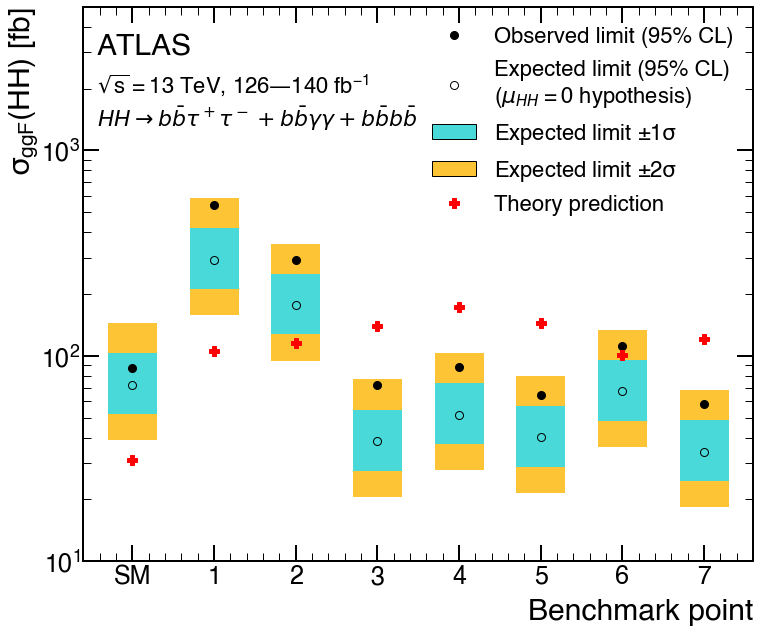

In [13]:
from quickstats.plots import UpperLimitBenchmarkPlot
import os,json
from quickstats.utils.common_utils import combine_dict
import pandas as pd
import matplotlib.pyplot as plt
channel = 'combined'

extra_text = r'$\mathit{HH\rightarrow b\bar{b}\tau^+\tau^- + b\bar{b}\gamma\gamma + b\bar{b}b\bar{b}}$'
basedir = output_dir

benchmarks = ['SM', '1', '2', '3', '4', '5', '6', '7']
benchmark_points = {'SM': [0,0,0,1,1],
                    '1': [0,0,0,5.11,1.1],
                    '2': [1/6,0,-1/3,6.84,1.03],
                    '3': [-1/3,0.5,0.5,2.21,1.05],
                    '4': [-1/6,-0.5,-1/3,2.79,0.9],
                    '5': [-1/3,-0.5,1/6,3.95,1.17],
                    '6': [-1/6,0.25,0.5,-0.68,0.9],
                    '7': [1,-1/6,1/6,-0.1,0.94]}
scenarios = ['stat_only', 'full_syst', 'no_eft_syst']
stages = ['blind', 'unblind']
stage_map = {
    'blind': 'Blind',
    'unblind': 'Unblind'
}
scenario_map = {
    'full_syst': 'Full syst',
    'stat_only': 'Stat only',
    'no_eft_syst': 'No EFT syst'
}
ylabel= "$\sigma_{ggF}(HH)$ [fb]"
ylim = (10, 5e3)

styles = {
    'legend': {
        'loc': 'upper right',
        'fontsize': 22
    },
    'errorbar':{
        'markersize': 8
    },
    'ratio_frames':{
        'height_ratios': (4, 1),
        'hspace': 0.07            
    },
    'axis': {
        'labelsize': 25
    },
    'xlabel': {
        'fontsize': 30
    },
    'ylabel': {
        'fontsize': 30
    },
    'text': {'fontsize': 22},
    'figure': {'figsize': (12,10), 'dpi': 72}
}

custom_styles = {
    'theory': {
        'marker': 'P',
        'markersize': 10
    }
}
color_pallete = {
    'theory': 'r'
}
xs_tool = HEFTXS()
df_combined = None
benchmarks_to_plot = []
for benchmark in benchmarks:
    filename = os.path.join(basedir, f"limit/heft/{channel}/bbbb_bbtautau_bbyy-fullcorr/BM{benchmark}", f"limits_mu_HH.json")
    if benchmark=="SM": filename = os.path.join(basedir, f"limit/heft/{channel}/bbbb_bbtautau_bbyy-fullcorr/BM0", f"limits_mu_HH.json")
    if not os.path.exists(filename):
        print(f"Benchmark {benchmark} does not exist")
        continue
    benchmarks_to_plot.append(benchmark)
    data = json.load(open(filename))
    for j,param in enumerate(['ctthh', 'cgghh', 'cggh', 'chhh', 'ctth']):
        data[param] = benchmark_points[benchmark][j]
    df = pd.DataFrame(data)
    print(benchmark, 'obs:', data['obs'][0]*xs_tool.get_xs(*benchmark_points[benchmark])[-1], 'exp:', data['0'][0]*xs_tool.get_xs(*benchmark_points[benchmark])[-1])
    print("Theo",benchmark,xs_tool.get_xs(*benchmark_points[benchmark])[-1])
    if df_combined is None:
        df_combined = df
    else:
        df_combined = pd.concat([df_combined, df])
df_combined = df_combined.set_index(['ctthh', 'cgghh', 'cggh', 'chhh', 'ctth'])
analysis_label_options = {'loc': (0.02, 0.95),
                          'fontsize':30, 'energy': '13 TeV',
                          'lumi': '126—140 fb$^{-1}$', 'dy': 0.01, 'dy_main': 0.01,
                          'extra_text': extra_text}
analysis_label_options_ = combine_dict(analysis_label_options)
analysis_label_options_['status'] = status
plotter = UpperLimitBenchmarkPlot(df_combined, styles=styles,labels=labels, 
                                  theory_func=xs_tool.get_xs,
                                  custom_styles=custom_styles,
                                  color_pallete=color_pallete,
                                  analysis_label_options=analysis_label_options_)
plotter.draw(xlabel='Benchmark point', ylabel=ylabel,
             xticklabels=benchmarks_to_plot, logy=True, ylim=ylim, scale_theory=True,
             draw_observed=True, draw_theory=True)
outpath = os.path.join(basedir,"figures", status, "limit", f"limit_BMs_{channel}.pdf")
dirname = os.path.dirname(outpath)
if not os.path.exists(dirname):
    os.makedirs(dirname)
print(f"Saving to {outpath}")
plt.savefig(outpath)
df_combined.to_csv(outpath.replace('.pdf', '.csv'))

SM obs: 87.50358975622991 exp: 72.18347181225751
Theo SM 31.050000000000004
1 obs: 544.6283336210943 exp: 294.39067440937987
Theo 1 105.57532777703075
2 obs: 294.191391996421 exp: 176.47719420015665
Theo 2 115.86904856652954
3 obs: 72.37146834134899 exp: 38.39111794145161
Theo 3 140.1050405273869
4 obs: 88.04575668753785 exp: 51.56119676736614
Theo 4 173.08816253580594
5 obs: 64.45805208722993 exp: 40.161121639251434
Theo 5 143.7804103916967
6 obs: 111.60809815032142 exp: 67.1600884459246
Theo 6 101.25077732333628
7 obs: 57.99783266249861 exp: 34.096236804040025
Theo 7 120.2623554721765
Saving to /Users/zhangrui/LargeBox/sandbox/HHcomb/hhcomb_to_upload/heft/output/figures/final/limit_BMs/limit_BMs_combined_all.pdf


<Figure size 640x480 with 0 Axes>

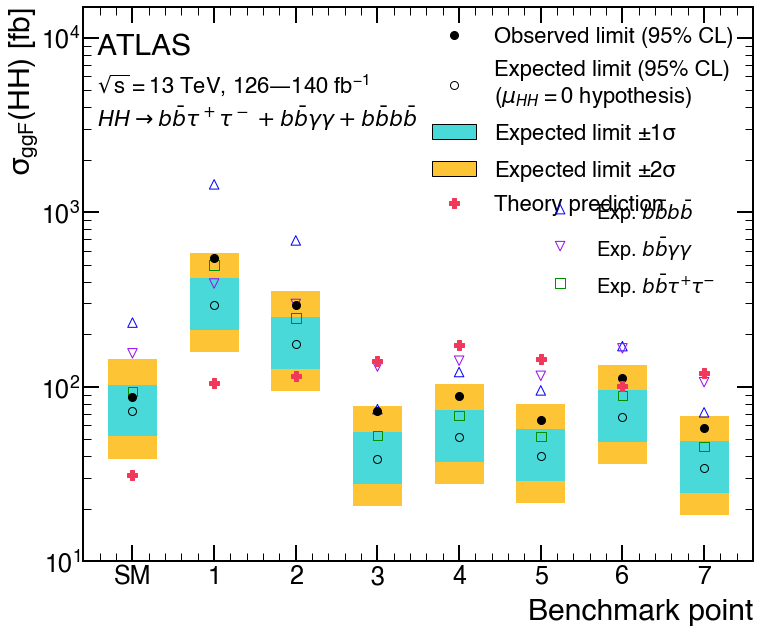

In [14]:
from quickstats.plots import UpperLimitBenchmarkPlot
import os,json
from quickstats.utils.common_utils import combine_dict
import pandas as pd
import matplotlib.pyplot as plt
channel = 'combined'

extra_text = r'$\mathit{HH\rightarrow b\bar{b}\tau^+\tau^- + b\bar{b}\gamma\gamma + b\bar{b}b\bar{b}}$'
basedir = output_dir


benchmarks = ['SM', '1', '2', '3', '4', '5', '6', '7']
benchmark_points = {'SM': [0,0,0,1,1],
                    '1': [0,0,0,5.11,1.1],
                    '2': [1/6,0,-1/3,6.84,1.03],
                    '3': [-1/3,0.5,0.5,2.21,1.05],
                    '4': [-1/6,-0.5,-1/3,2.79,0.9],
                    '5': [-1/3,-0.5,1/6,3.95,1.17],
                    '6': [-1/6,0.25,0.5,-0.68,0.9],
                    '7': [1,-1/6,1/6,-0.1,0.94]}
scenarios = ['stat_only', 'full_syst', 'no_eft_syst']
stages = ['blind', 'unblind']
stage_map = {
    'blind': 'Blind',
    'unblind': 'Unblind'
}
scenario_map = {
    'full_syst': 'Full syst',
    'stat_only': 'Stat only',
    'no_eft_syst': 'No EFT syst'
}
ylabel= "$\sigma_{ggF}(HH)$ [fb]"
ylim = (10, 1.5e4)
labels = {
    'expected': 'Expected limit (95% CL)\n'+r'($\mathit{\mu_{HH}} = 0$ hypothesis)',
    'observed': 'Observed limit (95% CL)'
}

styles = {
    'legend': {
        'loc': 'upper right',
        'fontsize': 22
    },
    'errorbar':{
        'markersize': 8
    },
    'ratio_frames':{
        'height_ratios': (4, 1),
        'hspace': 0.07            
    },
    'axis': {
        'labelsize': 25
    },
    'xlabel': {
        'fontsize': 30
    },
    'ylabel': {
        'fontsize': 30
    },
    'text': {'fontsize': 22},
    'figure': {'figsize': (12,10), 'dpi': 72}
}
marks = {
    'bbbb': "^",
    "bbtautau": 's',
    'bbyy': 'v'
}
custom_styles = {
    'theory': {
        'marker': 'P',
        'markersize': 10,
        'markeredgecolor': 'hh:darkpink',
        'markerfacecolor': 'hh:darkpink',
        'ecolor': 'hh:darkpink'
    }
}
color_pallete = {
    'theory': 'r'
}
xs_tool = HEFTXS()
df_combined = None
benchmarks_to_plot = []
theory_benchmarks = {}
for benchmark in benchmarks:
    filename = os.path.join(basedir, f"limit/heft/{channel}/bbbb_bbtautau_bbyy-fullcorr/BM{benchmark}", f"limits_mu_HH.json")
    if benchmark=="SM": filename = os.path.join(basedir, f"limit/heft/{channel}/bbbb_bbtautau_bbyy-fullcorr/BM0", f"limits_mu_HH.json")
    if not os.path.exists(filename):
        print(f"Benchmark {benchmark} does not exist")
        continue
    benchmarks_to_plot.append(benchmark)
    data = json.load(open(filename))
    for j,param in enumerate(['ctthh', 'cgghh', 'cggh', 'chhh', 'ctth']):
        data[param] = benchmark_points[benchmark][j]
    df = pd.DataFrame(data)
    print(benchmark, 'obs:', data['obs'][0]*xs_tool.get_xs(*benchmark_points[benchmark])[-1], 'exp:', data['0'][0]*xs_tool.get_xs(*benchmark_points[benchmark])[-1])
    print("Theo",benchmark,xs_tool.get_xs(*benchmark_points[benchmark])[-1])
    theory_benchmarks[benchmark] = xs_tool.get_xs(*benchmark_points[benchmark])[-1]
    if df_combined is None:
        df_combined = df
    else:
        df_combined = pd.concat([df_combined, df])
df_combined = df_combined.set_index(['ctthh', 'cgghh', 'cggh', 'chhh', 'ctth'])
analysis_label_options = {'loc': (0.02, 0.95),
                          'fontsize':30, 'energy': '13 TeV',
                          'lumi': '126—140 fb$^{-1}$', 'dy': 0.01, 'dy_main': 0.01,
                          'extra_text': extra_text}
analysis_label_options_ = combine_dict(analysis_label_options)
analysis_label_options_['status'] = status
plotter = UpperLimitBenchmarkPlot(df_combined, styles=styles,labels=labels, 
                                  theory_func=xs_tool.get_xs,
                                  custom_styles=custom_styles,
                                  color_pallete=color_pallete,
                                  analysis_label_options=analysis_label_options_)
ax = plotter.draw(xlabel='Benchmark point', ylabel=ylabel,
             xticklabels=benchmarks_to_plot, logy=True, ylim=ylim, scale_theory=True,
             draw_observed=True, draw_theory=True)
lines = []
for c in ['bbbb','bbyy','bbtautau']:
    c_data = []
    for i,benchmark in enumerate(benchmarks):
        filename = os.path.join(basedir, f"limit/heft/{c}/BM{benchmark}", f"limits_mu_HH.json")
        if benchmark=="SM": filename = os.path.join(basedir, f"limit/heft/{c}/BM0", f"limits_mu_HH.json")
        data = json.load(open(filename))
        line = ax.scatter(i, data['0'][0]*theory_benchmarks[benchmark], s=90, marker=marks[c], facecolors='none', edgecolors=styles_map[c]["color"],label="Exp. "+channel_label_map[c])
        # line, = ax.plot([i-0.3,i+0.3],[data['0'][0]*theory_benchmarks[benchmark],data['0'][0]*theory_benchmarks[benchmark]],label="Exp. "+channel_label_map[c],color=styles_map[c]["color"],linewidth=3,linestyle='dashed')
        # ax.plot([i-0.3,i+0.3],[data['obs'][0]*theory_benchmarks[benchmark],data['obs'][0]*theory_benchmarks[benchmark]],color=styles_map[c]["color"],linewidth=3)
    lines.append(line)
ax.add_artist(ax.get_legend())
ax.legend(handles=lines, loc=(0.67, 0.46), fontsize=20, handleheight=1.5)
outpath = os.path.join(basedir,"figures", status, "limit", f"limit_BMs_{channel}_all.pdf")
dirname = os.path.dirname(outpath)
if not os.path.exists(dirname):
    os.makedirs(dirname)
print(f"Saving to {outpath}")
plt.savefig(outpath)
df_combined.reset_index().T.to_csv(outpath.replace('.pdf', '.csv'))

In [ ]:
# import os
# import matplotlib.pyplot as plt
# import json
# import numpy as np
# import pandas as pd
# hh_fw = os.environ.get('hh_combination_fw_path', '/besfs5/users/cyz/HH_comb/hh_combination_fw')

# os.environ["OMP_NUM_THREADS"] = "1"
# os.environ["OPENBLAS_NUM_THREADS"] = "1"
# os.environ["MKL_NUM_THREADS"] = "1"
# os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
# os.environ["NUMEXPR_NUM_THREADS"] = "1"

# resonant_type = 'heft'
# status = 'int'

# if os.path.exists(os.path.join(hh_fw,"hhcomb_to_upload/heft","output")):
#     output_dir = os.path.join(os.path.join(hh_fw,"hhcomb_to_upload/heft","output"))
# else:
#     output_dir = os.path.join(hh_fw,"run_heft","output")
# combine_tag = 'bbtautau_bbyy-fullcorr'

# channel_label_map = {
#     'bbbb': r"$\mathit{b\bar{b}b\bar{b}}$",
#     'bbtautau': r"$\mathit{b\bar{b}\tau\hspace{-0.15}{^+}\hspace{-0.2}{\tau}\hspace{-0.15}{^-}}$",
#     'bbyy': r"$\mathit{b\bar{b}\gamma\gamma}$",
#     'combined': r"Combined",
# }
# channel_text = {
#     'combined': r'$\mathit{HH\rightarrow b\bar{b}\tau\hspace{-0.15}{^+}\hspace{-0.2}{\tau}\hspace{-0.15}{^-} + b\bar{b}\gamma\gamma}$',
#     # 'combined': 'HH combination',
#     'bbbb': r'$\mathit{HH\rightarrow b\bar{b}b\bar{b}}$',
#     'bbyy': r'$\mathit{HH\rightarrow b\bar{b}\gamma\gamma}$',
#     'bbtautau': r'$\mathit{HH\rightarrow b\bar{b}\tau\hspace{-0.15}{^+}\hspace{-0.2}{\tau}\hspace{-0.15}{^-}}$',
# }
# name_map = {'chhh': r"$\mathit{c_{hhh}}$",
#             'ctthh': r"$\mathit{c_{tthh}}$",
#             'cgghh': r"$\mathit{c_{gghh}}$"}
# default_analysis_label_options = {'loc': (0.03, 0.95),
#                                   'fontsize':30, 'energy': '13 TeV', 
#                                   'lumi': '140 fb$^{-1}$',
#                                   'status': status, 'dy': 0.01, 'dy_main': 0.01}
# styles_map = {
#     'bbyy': {"color": "#9A0EEA", "marker": ","},
#     'bbbb': {"color": 'blue', "marker": ","},
#     'bbtautau': {"color": "#008f00", "marker": ","},
#     'bbll': {"color": "#D2691E", "marker": ","},
#     'ml': {"color": "c", "marker": ","},
#     'combined': {"color": "k", "marker": ","},
# }
# config_map = {
#     'exp': {
#         'contourf_styles': {
#             'colors': ["#4AD9D9", "#FDC536"],
#             'alpha': 1
#         },
#         'fill_contour': True,
#         'legend_label': 'Expected (SM) {sigma_label}',
#         'bestfit_label': 'Expected best fit ({x:.2f}, {y:.2f})',            
#     },
#     'obs': {
#         'bestfit_styles': {
#             'marker': 'P',
#             'linewidth': 0,
#             'markersize': 15,
#             'color': 'k'
#         },
#         'contour_styles': {
#             'colors': ["k", "k"],
#             'linestyles': ['solid', 'dashed'],
#             'linewidths': 3
#         },
#         'legend_label': 'Observed {sigma_label}',
#         'bestfit_label': 'Best fit ({x:.2f}, {y:.2f})',
#         # 'interpolation': 'linear'
#     }
# }

# def set_plotdir(output_dir):
#     plotdir = os.path.join(output_dir, 'figures')
#     if not os.path.exists(plotdir):
#         os.makedirs(plotdir)
#     return plotdir


In [ ]:
# plotdir = set_plotdir(output_dir)

# from quickstats.maths.interpolation import get_intervals
# from quickstats.plots import Likelihood1DPlot
# ylabel = r"$-2\ ln\ \Lambda$"
# xrange = {'cgghh': (-0.7, 1.0), 'ctthh': (-0.7, 1.3)}
# styles = { 'legend': {'loc': 'upper right',
#                     'fontsize': 22},
#           'axis':{'tick_bothsides': True,
#                   'major_length': 12,
#                   'labelsize': 25},
#            'xlabel': {'fontsize': 30},
#            'ylabel': {'fontsize': 30},
#            'plot': {'linewidth': 3},
#           'text': {'fontsize': 24},
#           'figure': {'figsize': (12,10), 'dpi': 72}}
# anno_op = {'x': 0.28, 'y': 0.68, 'dy': 0.065, 'font_size': 22}
# channels = ['bbtautau', 'bbyy']
# combine_tag = "bbtautau_bbyy-fullcorr"

# for v in ['cgghh','ctthh']:
#     for o in ['obs','exp']:
#         default_analysis_label_options['extra_text'] = channel_text['combined'] + '//' + ('Observed' if o == 'obs' else 'Expected (SM)')
#         data = {}
#         for c in  ['combined'] + channels:
#             likelihood_path = os.path.join(output_dir, 'likelihood', resonant_type, c, combine_tag if c=='combined' else '', f'{v}_{o}', f'likelihoods_{v}.json')
#             if not os.path.exists(likelihood_path):
#                 print(likelihood_path, 'not exist')
#                 continue
#             data[c] = json.load(open(likelihood_path))
#         likelihood_df = {}
#         uncond_df = {}
#         likelihood_df_orig = {}
#         for c in data:
#             df = pd.DataFrame(data[c]).dropna(axis=1, how='all')
#             uncond_df[c] = df.drop(index=df.index[1:], axis=0, inplace=False)
#             df_scan = df.drop(index=df.index[0], axis=0, inplace=False)
#             likelihood_df_orig[c] = df_scan.drop(df_scan[df_scan['qmu']>100].index)
#             likelihood_df[c] = df_scan.drop(df_scan[df_scan['qmu']>6].index)
#         plotter = Likelihood1DPlot(likelihood_df, label_map=channel_label_map, styles_map=styles_map, styles=styles,
#                                    analysis_label_options=default_analysis_label_options, config={'errorband_legend': True})
#         ax = plotter.draw(xlabel=name_map[v], ylabel=ylabel, ymin=0, ymax=10, xmin=xrange[v][0], xmax=xrange[v][1], xattrib=v, interval_format='68_95')
#         dic = {}
#         for c in ['combined'] + channels:
#             dic[c] = {}
#             if c not in likelihood_df: continue
#             intersections_1 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=1, delta=0.0001)[0]
#             intersections_2 = get_intervals(likelihood_df_orig[c][v].values, likelihood_df_orig[c]['qmu'].values, level=3.84, delta=0.0001)[0]
#             dic[c]['68% low'], dic[c]['68% high'] = intersections_1
#             dic[c]['95% low'], dic[c]['95% high'] = intersections_2
#             if c == 'combined':
#                 ax.annotate(r'Combined:', 
#                             (anno_op['x'], anno_op['y']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
#                 ax.annotate(r'  $68\%$: '+name_map[v]+r'$ \in [%.1f, %.1f]$' %(intersections_1[0], intersections_1[1]), 
#                             (anno_op['x'], anno_op['y'] - anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
#                 ax.annotate(r'  $95\%$: '+name_map[v]+r'$ \in [%.1f, %.1f]$' %(intersections_2[0], intersections_2[1]), 
#                             (anno_op['x'], anno_op['y'] - 2 * anno_op['dy']), xycoords = 'axes fraction', fontsize = anno_op['font_size'])
#             print(v, o, c, '68%:', intersections_1, '95%:', intersections_2)
#         os.makedirs(os.path.join(plotdir, f'{status}/likelihood'), exist_ok=True)
#         filename = os.path.join(plotdir, f'{status}/likelihood', f"likelihood_{v}_{o}_2channel.pdf")
#         plt.savefig(filename)
#         plt.show()
#         print('Save to', filename)
#         dic = json.dumps(dic, indent=4, separators=(',', ': '))
#         with open(filename.replace('.pdf','.json'), 'w') as json_file:
#             json_file.write(dic)


In [ ]:
# plotdir = set_plotdir(output_dir)

# from quickstats.maths.interpolation import get_intervals
# from quickstats.plots import Likelihood1DPlot
# ylabel = r"$-2\ ln\ \Lambda$"
# xrange = {'cgghh': (-0.7, 1.0), 'ctthh': (-0.7, 1.3)}
# styles = { 'legend': {'loc': 'upper right','fontsize': 22, 'handleheight':1.25},
#            'text': {'fontsize': 24},
#            'xlabel': {'fontsize': 30},
#            'ylabel': {'fontsize': 30},
#            'plot': {'linewidth': 3},
#            'axis': {'labelsize': 25},
#            'figure': {'figsize': (12,10), 'dpi': 72}}
# anno_op = {'x': 0.34, 'y': 0.65, 'dy': 0.065, 'font_size': 19}
# channels = ['bbtautau', 'bbyy']

# for v in ['cgghh','ctthh']:
#     likelihood_df_all = {}
#     for o in ['obs','exp']:
#         default_analysis_label_options['extra_text'] = channel_text['combined'] + '//' + ('Observed' if o == 'obs' else 'Expected')
#         data = {}
#         for c in  ['combined'] + channels:
#             likelihood_path = os.path.join(output_dir, 'likelihood', resonant_type, c, combine_tag if c=='combined' else '', f'{v}_{o}', f'likelihoods_{v}.json')
#             if not os.path.exists(likelihood_path):
#                 print(likelihood_path, 'not exist')
#                 continue
#             data[c] = json.load(open(likelihood_path))
#         likelihood_df = {}
#         uncond_df = {}
#         likelihood_df_orig = {}
#         for c in data:
#             df = pd.DataFrame(data[c]).dropna(axis=1, how='all')
#             uncond_df[c] = df.drop(index=df.index[1:], axis=0, inplace=False)
#             df_scan = df.drop(index=df.index[0], axis=0, inplace=False)
#             likelihood_df_orig[c] = df_scan.drop(df_scan[df_scan['qmu']>100].index)
#             likelihood_df[c] = df_scan.drop(df_scan[df_scan['qmu']>6].index)
#         likelihood_df_all[o] = likelihood_df
#     likelihood_df_comb = {'combined':likelihood_df_all['obs']['combined']}
#     plotter = Likelihood1DPlot(likelihood_df_comb, label_map=channel_label_map, styles_map=styles_map, styles=styles,
#                                analysis_label_options=default_analysis_label_options, config={'errorband_legend': True})
#     ax = plotter.draw(xlabel=name_map[v], ylabel=ylabel, ymin=0, ymax=10, xmin=xrange[v][0], xmax=xrange[v][1], xattrib=v, interval_format='68_95')
#     intersections_obs = get_intervals(likelihood_df_all['obs']['combined'][v].values, likelihood_df_all['obs']['combined']['qmu'].values, level=3.84, delta=0.0001)[0]
#     intersections_exp = get_intervals(likelihood_df_all['exp']['combined'][v].values, likelihood_df_all['exp']['combined']['qmu'].values, level=3.84, delta=0.0001)[0]
#     line1, = ax.plot([], [], '-', color='k', label='Combined (observed)')
#     line2, = ax.plot([], [], '--', color='k', label='Combined (expected)')
#     legends = [line1, line2]
#     for c in likelihood_df_all['exp']:
#         data = likelihood_df_all['exp'][c]
#         line, = ax.plot(data[v], data['qmu'], color=styles_map[c]['color'], label=channel_label_map[c], linestyle='--', linewidth=2)
#         if c!='combined': legends.append(line)
#     ax.legend(handles=legends, **styles['legend'])
#     ax.add_artist(ax.get_legend())
#     line1, = ax.plot([], [], '-', color='k', label='Exp 95% CL: '+'[%.1f, %.1f]' %(intersections_exp[0], intersections_exp[1]))
#     line2, = ax.plot([], [], '--', color='k', label='Obs 95% CL: '+'[%.1f, %.1f]' %(intersections_obs[0], intersections_obs[1]))
#     ax.legend(handles=[line1,line2],loc=(0.1,0.57),fontsize=22)
#     os.makedirs(os.path.join(plotdir, f'{status}/likelihood'), exist_ok=True)
#     filename = os.path.join(plotdir, f'{status}/likelihood', f"likelihood_{v}_2channel.pdf")
#     plt.savefig(filename)
#     plt.show()
#     print('Save to', filename)
#     dic = json.dumps(dic, indent=4, separators=(',', ': '))
#     with open(filename.replace('.pdf','.json'), 'w') as json_file:
#         json_file.write(dic)


In [ ]:
# params = ('chhh', 'cgghh')
# plotdir = set_plotdir(output_dir)

# from quickstats.plots import Likelihood2DPlot
# channels = ['bbtautau', 'bbyy'] + ['combined']
# styles = {'legend':{'loc': 'upper right',
#                     'fontsize': 22},
#           'xlabel': {'fontsize': 30},
#           'ylabel': {'fontsize': 30},
#           'text': {'fontsize': 24},
#           'axis':{'labelsize': 25},
#           'figure': {'figsize': (12,10), 'dpi': 72}}

# dfs_all = {}
# for c in channels:
#     if c=='combined': rangec = {'xmin': -4, 'xmax': 12, 'ymin': -1.0, 'ymax': 1.4}
#     else: rangec = {'xmin': -10, 'xmax': 20, 'ymin': -1, 'ymax': 2}
#     analysis_label_options = default_analysis_label_options
#     analysis_label_options['extra_text'] = channel_text[c]
#     dfs = {}
#     data_obs = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_obs',f'likelihoods_{params[0]}_{params[1]}.json')))
#     dfs['obs'] = pd.DataFrame(data_obs)
#     data_exp = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_exp',f'likelihoods_{params[0]}_{params[1]}.json')))
#     dfs['exp'] = pd.DataFrame(data_exp)
#     dfs_all[c] = dfs
#     plotter = Likelihood2DPlot(dfs, config_map=config_map, styles=styles,
#                                analysis_label_options=analysis_label_options)
#     plotter.add_highlight(1, 0, label="SM prediction")
#     ax = plotter.draw(xattrib=params[0], yattrib=params[1],
#                       targets=['obs','exp'],
#                       xlabel=name_map[params[0]],
#                       ylabel=name_map[params[1]],
#                       draw_bestfit=['obs'],
#                       interval_format='68_95',**rangec)
#     os.makedirs(os.path.join(plotdir, f'{status}/likelihood_2d'), exist_ok=True)
#     filename = os.path.join(plotdir, f'{status}/likelihood_2d', f"likelihood_{params[0]}_{params[1]}_{c}_2channel.pdf")
#     if c=='combined':
#         print('Save to', filename)
#         plt.savefig(filename)
#         plt.show()


In [ ]:
# styles = {'legend':{'loc': 'upper right',
#                     'fontsize': 22},
#           'xlabel': {'fontsize': 30},
#           'ylabel': {'fontsize': 30},
#           'text': {'fontsize': 24},
#           'axis':{'labelsize': 25},
#           'figure': {'figsize': (12,10), 'dpi': 72}}
# config_map = {
#     'exp': {
#         'contour_styles': {
#             'colors': ["k","k"],
#             'linestyles': ['dashed','solid'],
#             'linewidths': 3
#         },
#         'legend_label': 'Expected {sigma_label}',
#         'bestfit_label': 'Expected best fit ({x:.2f}, {y:.2f})',            
#     },
#     'obs': {
#         # 'contourf_styles': {
#         #     'colors': ["#FDC536","#4AD9D9"],
#         #     'alpha': 1
#         # },
#         # 'fill_contour': True,
#         'contour_styles': {
#             'colors': ["k","k"],
#             'linestyles': ['solid','solid'],
#             'linewidths': 3
#         },
#         'bestfit_styles': {
#             'marker': 'P',
#             'linewidth': 0,
#             'markersize': 15,
#             'color': 'k'
#         },
#         'legend_label': 'Observed {sigma_label}',
#         'bestfit_label': 'Best fit ({x:.2f}, {y:.2f})',
#     }
# }

# rangec = {'xmin': -10, 'xmax': 18, 'ymin': -1.1, 'ymax': 2}
# plotter = Likelihood2DPlot(dfs_all['combined'], config={"interval_formats": {"95": ['0.95']},'interpolation':'cubic'}, config_map=config_map, styles=styles, analysis_label_options=analysis_label_options)
# plotter.add_highlight(1, 0, label="SM prediction")
# ax = plotter.draw(xattrib=params[0], yattrib=params[1],
#                   targets=['obs','exp'],
#                   xlabel=name_map[params[0]],
#                   ylabel=name_map[params[1]],
#                   draw_bestfit=['obs'],
#                   interval_format='95',**rangec)
# lines = []
# for c in ['bbyy', 'bbtautau']:
#     plotter.draw_single_data(ax, dfs_all[c]['exp'], xattrib=params[0], yattrib=params[1], interval_format='95',config={'contour_styles':{'colors':styles_map[c]['color'],'linestyles':'dashed'},'fill_contour':False,'legend_label':'','interpolation':'cubic'})
#     line, = ax.plot([], [], '--', linewidth=2, color=styles_map[c]['color'], label=channel_label_map[c])
#     lines.append(line)
# ax.add_artist(ax.get_legend())
# ax.legend(handles=lines, loc=(0.76, 0.57), fontsize=20, handleheight=1.5)
# # plt.text(-14, -0.35, 'Expected 95% CL:', fontsize=18)
# filename = os.path.join(plotdir, f'{status}/likelihood_2d', f"likelihood_{params[0]}_{params[1]}_2channel.pdf")
# print('Save to', filename)
# plt.savefig(filename)
# plt.show()

In [ ]:
# params = ('chhh', 'ctthh')
# plotdir = set_plotdir(output_dir)
# config_map = {
#     'exp': {
#         'contourf_styles': {
#             'colors': ["#4AD9D9", "#FDC536"],
#             'alpha': 1
#         },
#         'fill_contour': True,
#         'legend_label': 'Expected (SM) {sigma_label}',
#         'bestfit_label': 'Expected best fit ({x:.2f}, {y:.2f})',            
#     },
#     'obs': {
#         'bestfit_styles': {
#             'marker': 'P',
#             'linewidth': 0,
#             'markersize': 15,
#             'color': 'k'
#         },
#         'contour_styles': {
#             'colors': ["k", "k"],
#             'linestyles': ['solid', 'dashed'],
#             'linewidths': 3
#         },
#         'legend_label': 'Observed {sigma_label}',
#         'bestfit_label': 'Best fit ({x:.2f}, {y:.2f})',
#         # 'interpolation': 'linear'
#     }
# }

# from quickstats.plots import Likelihood2DPlot
# channels = ['bbyy', 'bbtautau'] + ['combined']
# styles = {'legend':{'loc': 'upper right',
#                     'fontsize': 22},
#           'xlabel': {'fontsize': 30},
#           'ylabel': {'fontsize': 30},
#           'text': {'fontsize': 24},
#           'axis':{'labelsize': 25},
#           'figure': {'figsize': (12,10), 'dpi': 72}}

# dfs_all = {}
# for c in channels:
#     if c=='combined': rangec = {'xmin': -11, 'xmax': 14, 'ymin': -1.5, 'ymax': 4}
#     else: rangec = {'xmin': -10, 'xmax': 20, 'ymin': -2, 'ymax': 5}
#     analysis_label_options = default_analysis_label_options
#     analysis_label_options['extra_text'] = channel_text[c]
#     dfs = {}
#     data_obs = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_obs',f'likelihoods_{params[0]}_{params[1]}.json')))
#     dfs['obs'] = pd.DataFrame(data_obs)
#     data_exp = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_exp',f'likelihoods_{params[0]}_{params[1]}.json')))
#     dfs['exp'] = pd.DataFrame(data_exp)
#     dfs_all[c] = dfs
#     plotter = Likelihood2DPlot(dfs, config_map=config_map, styles=styles,
#                                analysis_label_options=analysis_label_options)
#     plotter.add_highlight(1, 0, label="SM prediction")
#     ax = plotter.draw(xattrib=params[0], yattrib=params[1],
#                       targets=['obs','exp'],
#                       xlabel=name_map[params[0]],
#                       ylabel=name_map[params[1]],
#                       draw_bestfit=['obs'],
#                       interval_format='68_95',**rangec)
#     os.makedirs(os.path.join(plotdir, f'{status}/likelihood_2d'), exist_ok=True)
#     filename = os.path.join(plotdir, f'{status}/likelihood_2d', f"likelihood_{params[0]}_{params[1]}_{c}_2channel.pdf")
#     if c=='combined':
#         print('Save to', filename)
#         plt.savefig(filename)
#         plt.show()


In [ ]:
# styles = {'legend':{'loc': 'upper right',
#                     'fontsize': 22},
#           'xlabel': {'fontsize': 30},
#           'ylabel': {'fontsize': 30},
#           'text': {'fontsize': 24},
#           'axis':{'labelsize': 25},
#           'figure': {'figsize': (12,10), 'dpi': 72}}
# config_map = {
#     'exp': {
#         'contour_styles': {
#             'colors': ["k","k"],
#             'linestyles': ['dashed','solid'],
#             'linewidths': 3
#         },
#         'legend_label': 'Expected {sigma_label}',
#         'bestfit_label': 'Expected best fit ({x:.2f}, {y:.2f})',            
#     },
#     'obs': {
#         # 'contourf_styles': {
#         #     'colors': ["#FDC536","#4AD9D9"],
#         #     'alpha': 1
#         # },
#         # 'fill_contour': True,
#         'contour_styles': {
#             'colors': ["k","k"],
#             'linestyles': ['solid','solid'],
#             'linewidths': 3
#         },
#         'bestfit_styles': {
#             'marker': 'P',
#             'linewidth': 0,
#             'markersize': 15,
#             'color': 'k'
#         },
#         'legend_label': 'Observed {sigma_label}',
#         'bestfit_label': 'Best fit ({x:.2f}, {y:.2f})',
#     }
# }
# rangec = {'xmin': -10, 'xmax': 14, 'ymin': -2, 'ymax': 4}
# plotter = Likelihood2DPlot(dfs_all['combined'], config={"interval_formats": {"95": ['0.95']}}, config_map=config_map, styles=styles, analysis_label_options=analysis_label_options)
# plotter.add_highlight(1, 0, label="SM prediction")
# ax = plotter.draw(xattrib=params[0], yattrib=params[1],
#                   targets=['obs','exp'],
#                   xlabel=name_map[params[0]],
#                   ylabel=name_map[params[1]],
#                   draw_bestfit=['obs'],
#                   interval_format='95',**rangec)
# lines = []
# for c in ['bbyy', 'bbtautau']:
#     plotter.draw_single_data(ax, dfs_all[c]['exp'], xattrib=params[0], yattrib=params[1], interval_format='95',config={'contour_styles':{'colors':styles_map[c]['color'],'linestyles':'dashed'},'fill_contour':False,'legend_label':'','interpolation':'cubic'})
#     line, = ax.plot([], [], '--', linewidth=2, color=styles_map[c]['color'], label=channel_label_map[c])
#     lines.append(line)
# ax.add_artist(ax.get_legend())
# ax.legend(handles=lines, loc=(0.76, 0.53), fontsize=20, handleheight=1.5)
# filename = os.path.join(plotdir, f'{status}/likelihood_2d', f"likelihood_{params[0]}_{params[1]}_2channel.pdf")
# print('Save to', filename)
# plt.savefig(filename)
# plt.show()

In [ ]:
# params = ('cgghh', 'ctthh')
# plotdir = set_plotdir(output_dir)
# config_map = {
#     'exp': {
#         'contourf_styles': {
#             'colors': ["#4AD9D9", "#FDC536"],
#             'alpha': 1
#         },
#         'fill_contour': True,
#         'legend_label': 'Expected (SM) {sigma_label}',
#         'bestfit_label': 'Expected best fit ({x:.2f}, {y:.2f})',            
#     },
#     'obs': {
#         'bestfit_styles': {
#             'marker': 'P',
#             'linewidth': 0,
#             'markersize': 15,
#             'color': 'k'
#         },
#         'contour_styles': {
#             'colors': ["k", "k"],
#             'linestyles': ['solid', 'dashed'],
#             'linewidths': 3
#         },
#         'legend_label': 'Observed {sigma_label}',
#         'bestfit_label': 'Best fit ({x:.2f}, {y:.2f})',
#         # 'interpolation': 'linear'
#     }
# }

# from quickstats.plots import Likelihood2DPlot
# channels = ['bbyy', 'bbtautau'] + ['combined']
# styles = {'legend':{'loc': 'upper right',
#                     'fontsize': 22},
#           'xlabel': {'fontsize': 30},
#           'ylabel': {'fontsize': 30},
#           'text': {'fontsize': 24},
#           'axis':{'labelsize': 25},
#           'figure': {'figsize': (12,10), 'dpi': 72}}

# dfs_all = {}
# for c in channels:
#     if c=='combined': rangec = {'xmin': -0.8, 'xmax': 0.6, 'ymin': -0.6, 'ymax': 2}
#     else: rangec = {'xmin': -1.2, 'xmax': 1, 'ymin': -1, 'ymax': 3}
#     analysis_label_options = default_analysis_label_options
#     analysis_label_options['extra_text'] = channel_text[c]
#     dfs = {}
#     data_obs = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_obs',f'likelihoods_{params[0]}_{params[1]}.json')))
#     dfs['obs'] = pd.DataFrame(data_obs)
#     data_exp = json.load(open(os.path.join(output_dir,'likelihood',resonant_type,c,combine_tag if c=='combined' else '',f'{params[0]}_{params[1]}_exp',f'likelihoods_{params[0]}_{params[1]}.json')))
#     dfs['exp'] = pd.DataFrame(data_exp)
#     dfs_all[c] = dfs
#     plotter = Likelihood2DPlot(dfs, config_map=config_map, styles=styles,
#                                analysis_label_options=analysis_label_options)
#     plotter.add_highlight(0, 0, label="SM prediction")
#     ax = plotter.draw(xattrib=params[0], yattrib=params[1],
#                       targets=['obs','exp'],
#                       xlabel=name_map[params[0]],
#                       ylabel=name_map[params[1]],
#                       draw_bestfit=['obs'],
#                       interval_format='68_95',**rangec)
#     os.makedirs(os.path.join(plotdir, f'{status}/likelihood_2d'), exist_ok=True)
#     filename = os.path.join(plotdir, f'{status}/likelihood_2d', f"likelihood_{params[0]}_{params[1]}_{c}_2channel.pdf")
#     if c=='combined':
#         print('Save to', filename)
#         plt.savefig(filename)
#         plt.show()
